In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/dataset.csv')

# Initial exploration
print(df.shape)
print(df.info())
print(df.describe())


(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(

In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve,
                             classification_report)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Sklearn imports
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, precision_recall_curve)

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Model imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [11]:
print("="*70)
print("DATA EXPLORATION")
print("="*70)

# Basic info
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n📋 Column Information:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

# Check for missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values!")
else:
    print(missing[missing > 0])

# Target distribution
print("\n🎯 Target Variable Distribution:")
print(df['Machine failure'].value_counts())
print(f"\nFailure Rate: {df['Machine failure'].mean()*100:.2f}%")

DATA EXPLORATION

📊 Dataset Shape: 10000 rows × 14 columns

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  


/tmp/ipython-input-3511231590.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_failure, failure],
/tmp/ipython-input-3511231590.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_failure, failure],
/tmp/ipython-input-3511231590.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_failure, failure],
/tmp/ipython-input-3511231590.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_fai

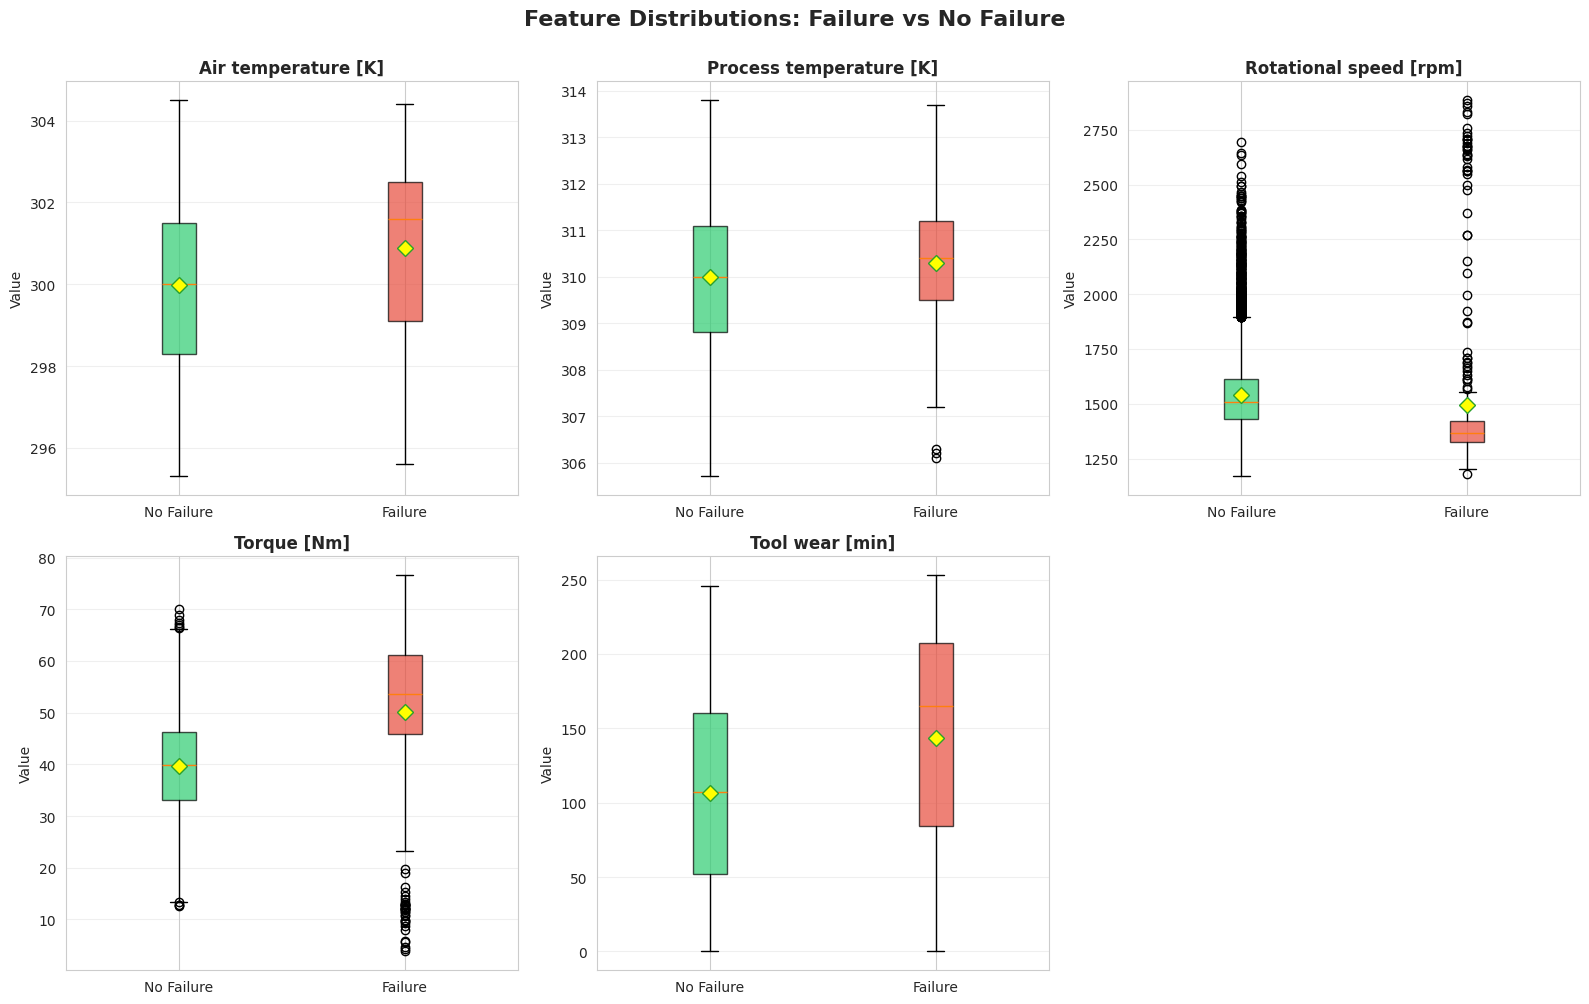

In [12]:
features_to_plot = ['Air temperature [K]', 'Process temperature [K]',
                   'Rotational speed [rpm]', 'Torque [Nm]',
                   'Tool wear [min]']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    # Separate data by failure status
    no_failure = df[df['Machine failure']==0][feature]
    failure = df[df['Machine failure']==1][feature]

    # Box plot
    bp = axes[idx].boxplot([no_failure, failure],
                          labels=['No Failure', 'Failure'],
                          patch_artist=True,
                          showmeans=True,
                          meanprops=dict(marker='D', markerfacecolor='yellow', markersize=8))

    # Color boxes
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_facecolor('#e74c3c')
    bp['boxes'][1].set_alpha(0.7)

    axes[idx].set_title(feature, fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Feature Distributions: Failure vs No Failure',
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

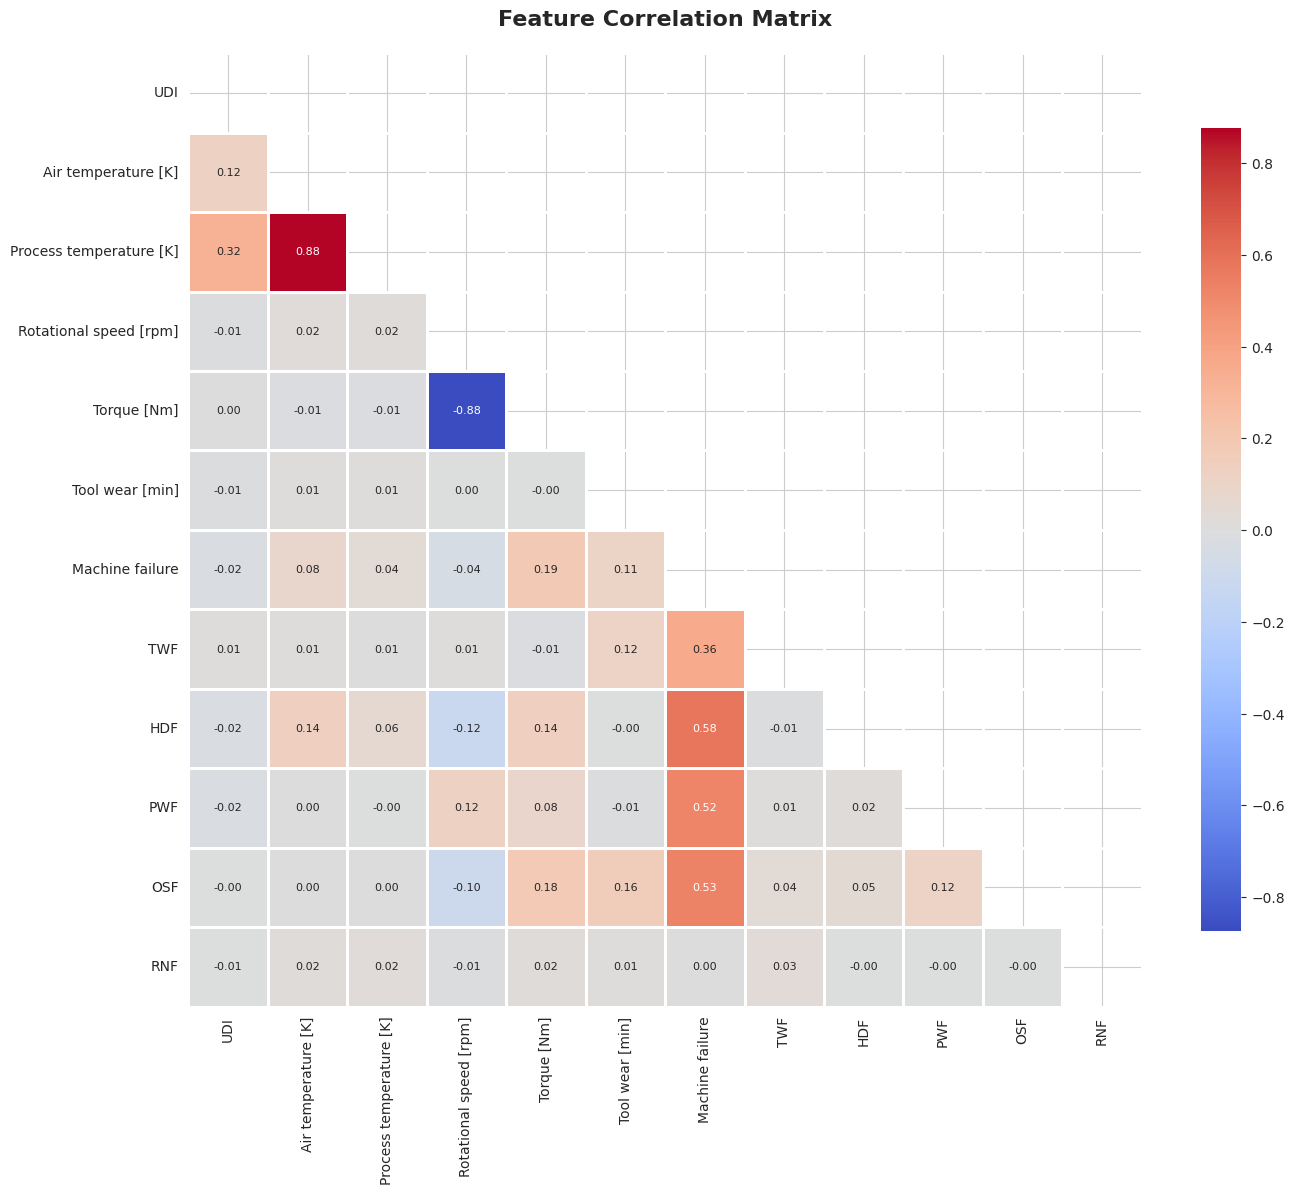


📊 Features Most Correlated with Machine Failure:
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
RNF                        0.004516
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


In [13]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
           cmap='coolwarm', center=0, square=True,
           linewidths=1, cbar_kws={"shrink": 0.8},
           annot_kws={'size': 8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print highly correlated features with target
print("\n📊 Features Most Correlated with Machine Failure:")
target_corr = corr_matrix['Machine failure'].sort_values(ascending=False)
print(target_corr[target_corr.index != 'Machine failure'])


In [14]:
print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create a copy for feature engineering
df_engineered = df.copy()

# 1. Temperature difference (thermal stress)
df_engineered['Temp_diff'] = (df_engineered['Process temperature [K]'] -
                               df_engineered['Air temperature [K]'])
print("✅ Created: Temperature difference")

# 2. Power (Physics-based: Power = Torque × Angular Velocity)
df_engineered['Power'] = (df_engineered['Torque [Nm]'] *
                          df_engineered['Rotational speed [rpm]'] * 2 * np.pi / 60)
print("✅ Created: Power (Torque × RPM)")

# 3. Tool wear per rotation
df_engineered['Wear_per_rotation'] = (df_engineered['Tool wear [min]'] /
                                      (df_engineered['Rotational speed [rpm]'] + 1))
print("✅ Created: Wear per rotation")

# 4. Torque-to-speed ratio (efficiency indicator)
df_engineered['Torque_speed_ratio'] = (df_engineered['Torque [Nm]'] /
                                       (df_engineered['Rotational speed [rpm]'] + 1))
print("✅ Created: Torque-to-speed ratio")

# 5. Thermal stress indicator
df_engineered['Thermal_stress'] = (df_engineered['Process temperature [K]'] *
                                   df_engineered['Torque [Nm]'])
print("✅ Created: Thermal stress indicator")

# 6. Tool wear squared (non-linear wear effect)
df_engineered['Tool_wear_squared'] = df_engineered['Tool wear [min]'] ** 2
print("✅ Created: Tool wear squared")

# 7. Temperature risk zones
df_engineered['Temp_risk_zone'] = pd.cut(
    df_engineered['Process temperature [K]'],
    bins=[0, 309, 311, 315],
    labels=[0, 1, 2]
).astype(int)
print("✅ Created: Temperature risk zones")

# 8. RPM deviation from mean
df_engineered['RPM_deviation'] = abs(
    df_engineered['Rotational speed [rpm]'] -
    df_engineered['Rotational speed [rpm]'].mean()
)
print("✅ Created: RPM deviation")

# 9. Encode 'Type' column
le = LabelEncoder()
df_engineered['Type_encoded'] = le.fit_transform(df_engineered['Type'])
print("✅ Encoded: Product Type")

print(f"\n✅ Feature engineering complete!")
print(f"Total features: {len(df_engineered.columns)}")

# Show new features
print("\n🔍 Sample of engineered features:")
df_engineered[['Temp_diff', 'Power', 'Wear_per_rotation',
               'Torque_speed_ratio', 'Machine failure']].head()



FEATURE ENGINEERING
✅ Created: Temperature difference
✅ Created: Power (Torque × RPM)
✅ Created: Wear per rotation
✅ Created: Torque-to-speed ratio
✅ Created: Thermal stress indicator
✅ Created: Tool wear squared
✅ Created: Temperature risk zones
✅ Created: RPM deviation
✅ Encoded: Product Type

✅ Feature engineering complete!
Total features: 23

🔍 Sample of engineered features:


,Temp_diff,Power,Wear_per_rotation,Torque_speed_ratio,Machine failure
0,10.5,6951.590560,0.000000,0.027577,0
1,10.5,6826.722724,0.002129,0.032860,0
2,10.4,7749.387543,0.003336,0.032955,0
3,10.4,5927.504659,0.004881,0.027545,0
4,10.5,5897.816608,0.006388,0.028389,0


In [15]:
print("="*70)
print("FEATURE SELECTION & PREPARATION")
print("="*70)

# Drop irrelevant columns
drop_cols = ['UDI', 'Product ID', 'Type']

# Separate features and target
X = df_engineered.drop(columns=drop_cols + ['Machine failure'], errors='ignore')
y = df_engineered['Machine failure']

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Target vector shape: {y.shape}")
print(f"\n📋 Features used ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")


FEATURE SELECTION & PREPARATION
✅ Feature matrix shape: (10000, 19)
✅ Target vector shape: (10000,)

📋 Features used (19):
   1. Air temperature [K]
   2. Process temperature [K]
   3. Rotational speed [rpm]
   4. Torque [Nm]
   5. Tool wear [min]
   6. TWF
   7. HDF
   8. PWF
   9. OSF
  10. RNF
  11. Temp_diff
  12. Power
  13. Wear_per_rotation
  14. Torque_speed_ratio
  15. Thermal_stress
  16. Tool_wear_squared
  17. Temp_risk_zone
  18. RPM_deviation
  19. Type_encoded


In [16]:
print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"✅ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n📊 Training set class distribution:")
print(f"  No Failure: {(y_train==0).sum()} ({(y_train==0).mean()*100:.2f}%)")
print(f"  Failure: {(y_train==1).sum()} ({(y_train==1).mean()*100:.2f}%)")

print(f"\n📊 Test set class distribution:")
print(f"  No Failure: {(y_test==0).sum()} ({(y_test==0).mean()*100:.2f}%)")
print(f"  Failure: {(y_test==1).sum()} ({(y_test==1).mean()*100:.2f}%)")


TRAIN-TEST SPLIT
✅ Training set: 8000 samples (80.0%)
✅ Test set: 2000 samples (20.0%)

📊 Training set class distribution:
  No Failure: 7729 (96.61%)
  Failure: 271 (3.39%)

📊 Test set class distribution:
  No Failure: 1932 (96.60%)
  Failure: 68 (3.40%)


In [17]:
print("FEATURE SCALING")
print("="*70)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("✅ Features standardized (mean=0, std=1)")
print("\n📊 Sample statistics after scaling:")
print(X_train_scaled.describe().loc[['mean', 'std']].round(4))

FEATURE SCALING
✅ Features standardized (mean=0, std=1)

📊 Sample statistics after scaling:
      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
mean               0.0000                   0.0000                  0.0000   
std                1.0001                   1.0001                  1.0001   

      Torque [Nm]  Tool wear [min]     TWF     HDF     PWF     OSF     RNF  \
mean      -0.0000          -0.0000 -0.0000 -0.0000  0.0000  0.0000 -0.0000   
std        1.0001           1.0001  1.0001  1.0001  1.0001  1.0001  1.0001   

      Temp_diff   Power  Wear_per_rotation  Torque_speed_ratio  \
mean    -0.0000  0.0000             0.0000             -0.0000   
std      1.0001  1.0001             1.0001              1.0001   

      Thermal_stress  Tool_wear_squared  Temp_risk_zone  RPM_deviation  \
mean          0.0000             0.0000          0.0000        -0.0000   
std           1.0001             1.0001          1.0001         1.0001   

      Type_encod

In [18]:

print("="*70)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("="*70)

print("📊 Before SMOTE:")
print(f"  No Failure: {(y_train==0).sum()} ({(y_train==0).mean()*100:.1f}%)")
print(f"  Failure: {(y_train==1).sum()} ({(y_train==1).mean()*100:.1f}%)")
print(f"  Imbalance Ratio: {(y_train==0).sum() / (y_train==1).sum():.1f}:1")

# Apply SMOTE-Tomek (combination of oversampling and undersampling)
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_scaled, y_train)

print(f"\n📊 After SMOTE-Tomek:")
print(f"  No Failure: {(y_train_balanced==0).sum()} ({(y_train_balanced==0).mean()*100:.1f}%)")
print(f"  Failure: {(y_train_balanced==1).sum()} ({(y_train_balanced==1).mean()*100:.1f}%)")
print(f"  Imbalance Ratio: {(y_train_balanced==0).sum() / (y_train_balanced==1).sum():.1f}:1")

print(f"\n✅ Training samples increased from {len(y_train)} to {len(y_train_balanced)}")
print("💡 SMOTE created synthetic failure examples for better learning!")


HANDLING CLASS IMBALANCE WITH SMOTE
📊 Before SMOTE:
  No Failure: 7729 (96.6%)
  Failure: 271 (3.4%)
  Imbalance Ratio: 28.5:1

📊 After SMOTE-Tomek:
  No Failure: 7728 (50.0%)
  Failure: 7728 (50.0%)
  Imbalance Ratio: 1.0:1

✅ Training samples increased from 8000 to 15456
💡 SMOTE created synthetic failure examples for better learning!


In [19]:
print("="*70)
print("MODEL 1: RANDOM FOREST")
print("="*70)

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Train
print("🔄 Training Random Forest...")
rf_model.fit(X_train_balanced, y_train_balanced)
print("✅ Training complete!")

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("\n📊 RANDOM FOREST RESULTS:")
print(f"  Accuracy:  {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"  Precision: {prec_rf:.4f} ({prec_rf*100:.2f}%)")
print(f"  Recall:    {rec_rf:.4f} ({rec_rf*100:.2f}%)")
print(f"  F1-Score:  {f1_rf:.4f} ({f1_rf*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_rf:.4f} ({roc_auc_rf*100:.2f}%)")



MODEL 1: RANDOM FOREST
🔄 Training Random Forest...
✅ Training complete!

📊 RANDOM FOREST RESULTS:
  Accuracy:  0.9980 (99.80%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9412 (94.12%)
  F1-Score:  0.9697 (96.97%)
  ROC-AUC:   0.9901 (99.01%)


In [22]:
print("="*70)
print("MODEL 2: XGBOOST")
print("="*70)
# Calculate scale_pos_weight for imbalance
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# Rename columns to remove special characters
X_train_balanced_renamed = X_train_balanced.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))
X_test_scaled_renamed = X_test_scaled.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))


# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    verbosity=0
)

# Train
print("🔄 Training XGBoost...")
xgb_model.fit(X_train_balanced_renamed, y_train_balanced)
print("✅ Training complete!")

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled_renamed)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled_renamed)[:, 1]

# Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("\n📊 XGBOOST RESULTS:")
print(f"  Accuracy:  {acc_xgb:.4f} ({acc_xgb*100:.2f}%)")
print(f"  Precision: {prec_xgb:.4f} ({prec_xgb*100:.2f}%)")
print(f"  Recall:    {rec_xgb:.4f} ({rec_xgb*100:.2f}%)")
print(f"  F1-Score:  {f1_xgb:.4f} ({f1_xgb*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_xgb:.4f} ({roc_auc_xgb*100:.2f}%)")

MODEL 2: XGBOOST
🔄 Training XGBoost...
✅ Training complete!

📊 XGBOOST RESULTS:
  Accuracy:  0.9985 (99.85%)
  Precision: 0.9851 (98.51%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9778 (97.78%)
  ROC-AUC:   0.9930 (99.30%)


In [23]:
print("="*70)
print("MODEL 3: GRADIENT BOOSTING")
print("="*70)

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    random_state=42,
    verbose=0
)

# Train
print("🔄 Training Gradient Boosting...")
gb_model.fit(X_train_balanced, y_train_balanced)
print("✅ Training complete!")

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)
y_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
rec_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)

print("\n📊 GRADIENT BOOSTING RESULTS:")
print(f"  Accuracy:  {acc_gb:.4f} ({acc_gb*100:.2f}%)")
print(f"  Precision: {prec_gb:.4f} ({prec_gb*100:.2f}%)")
print(f"  Recall:    {rec_gb:.4f} ({rec_gb*100:.2f}%)")
print(f"  F1-Score:  {f1_gb:.4f} ({f1_gb*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_gb:.4f} ({roc_auc_gb*100:.2f}%)")

MODEL 3: GRADIENT BOOSTING
🔄 Training Gradient Boosting...
✅ Training complete!

📊 GRADIENT BOOSTING RESULTS:
  Accuracy:  0.9990 (99.90%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9851 (98.51%)
  ROC-AUC:   0.9945 (99.45%)


MODEL COMPARISON
            Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
    Random Forest    0.9980   1.000000 0.941176  0.969697 0.990105
          XGBoost    0.9985   0.985075 0.970588  0.977778 0.993020
Gradient Boosting    0.9990   1.000000 0.970588  0.985075 0.994497

🏆 BEST MODEL: Gradient Boosting (F1-Score: 0.9851)


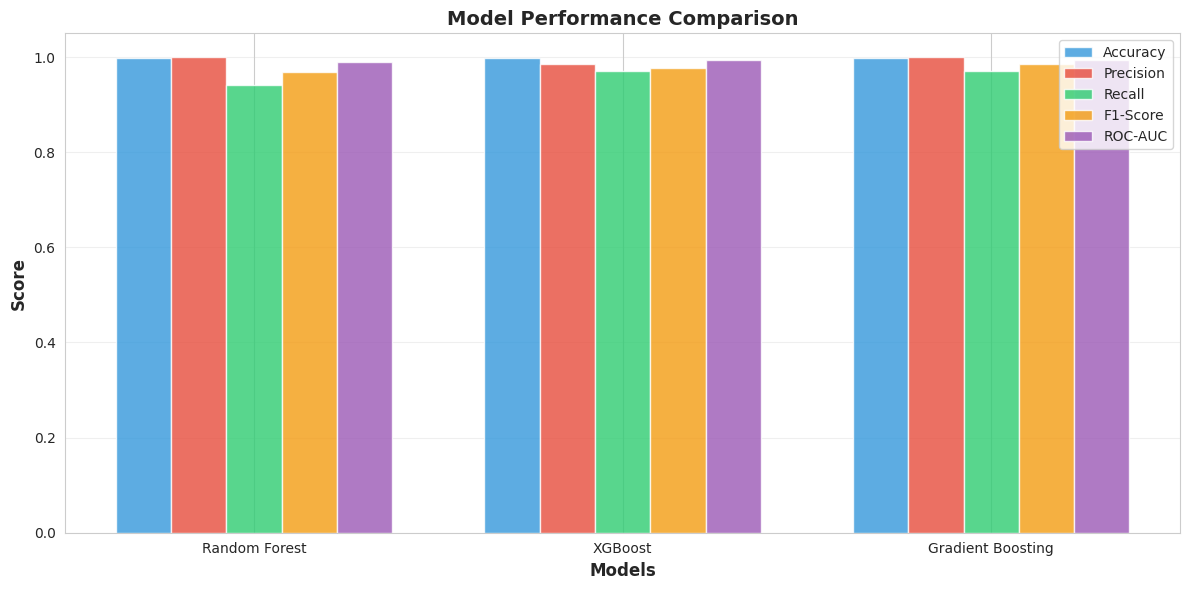

In [24]:
print("="*70)
print("MODEL COMPARISON")
print("="*70)

# Create comparison dataframe
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [acc_rf, acc_xgb, acc_gb],
    'Precision': [prec_rf, prec_xgb, prec_gb],
    'Recall': [rec_rf, rec_xgb, rec_gb],
    'F1-Score': [f1_rf, f1_xgb, f1_gb],
    'ROC-AUC': [roc_auc_rf, roc_auc_xgb, roc_auc_gb]
})

print(results_df.to_string(index=False))

# Find best model by F1-score
best_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_f1 = results_df.loc[best_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model_name} (F1-Score: {best_f1:.4f})")

# Select best model
if best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf
    y_proba_best = y_proba_rf
elif best_model_name == 'XGBoost':
    best_model = xgb_model
    y_pred_best = y_pred_xgb
    y_proba_best = y_proba_xgb
else:
    best_model = gb_model
    y_pred_best = y_pred_gb
    y_proba_best = y_proba_gb

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.15

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(results_df['Model'])
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()



THRESHOLD OPTIMIZATION
📊 Default threshold (0.5):
  F1-Score: 0.9851

📊 Optimal threshold (0.5478):
  F1-Score: 0.9851

✅ OPTIMIZED RESULTS:
  Accuracy:  0.9990 (99.90%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9851 (98.51%)


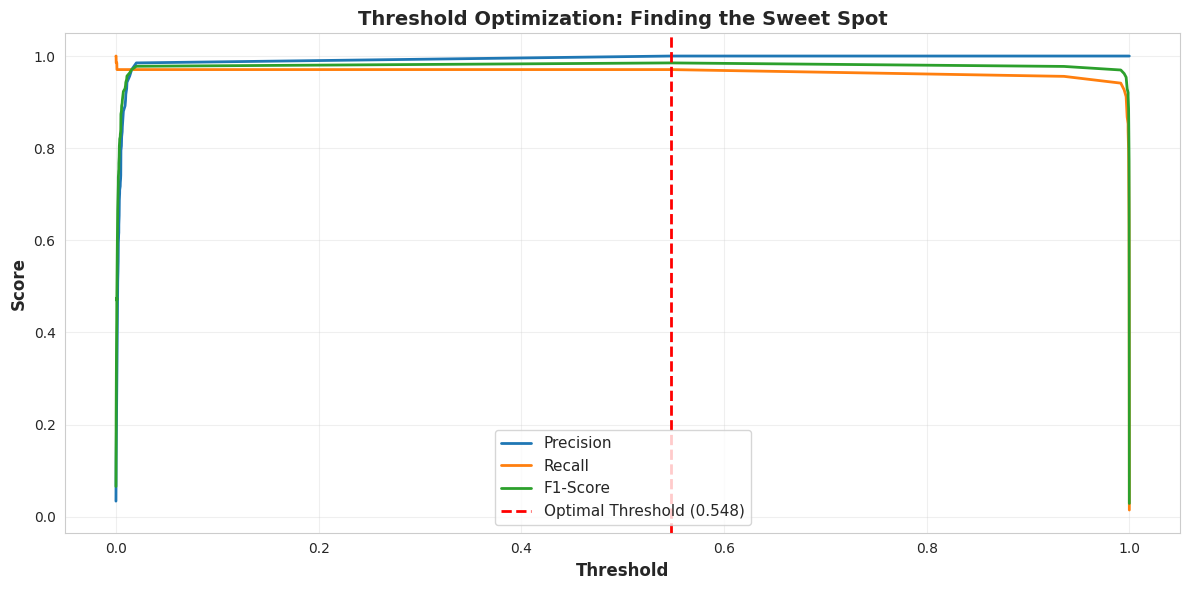

In [25]:
print("="*70)
print("THRESHOLD OPTIMIZATION")
print("="*70)

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"📊 Default threshold (0.5):")
print(f"  F1-Score: {f1_score(y_test, (y_proba_best >= 0.5).astype(int)):.4f}")

print(f"\n📊 Optimal threshold ({optimal_threshold:.4f}):")
print(f"  F1-Score: {optimal_f1:.4f}")

# Apply optimal threshold
y_pred_optimized = (y_proba_best >= optimal_threshold).astype(int)

# Evaluate with optimal threshold
acc_opt = accuracy_score(y_test, y_pred_optimized)
prec_opt = precision_score(y_test, y_pred_optimized)
rec_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)

print(f"\n✅ OPTIMIZED RESULTS:")
print(f"  Accuracy:  {acc_opt:.4f} ({acc_opt*100:.2f}%)")
print(f"  Precision: {prec_opt:.4f} ({prec_opt*100:.2f}%)")
print(f"  Recall:    {rec_opt:.4f} ({rec_opt*100:.2f}%)")
print(f"  F1-Score:  {f1_opt:.4f} ({f1_opt*100:.2f}%)")

# Visualize threshold optimization
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', linewidth=2)
plt.axvline(optimal_threshold, color='red', linestyle='--', linewidth=2,
            label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.xlabel('Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Threshold Optimization: Finding the Sweet Spot', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



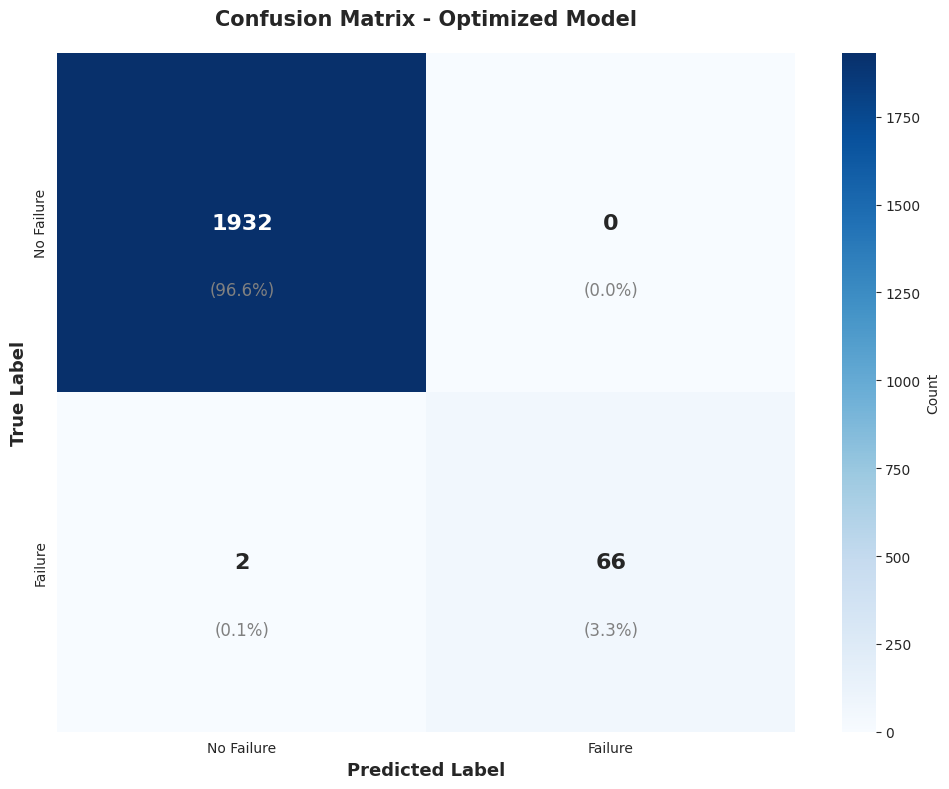


CONFUSION MATRIX BREAKDOWN
True Negatives (Correct No-Failure):   1932 (96.60%)
False Positives (False Alarms):           0 (0.00%)
False Negatives (Missed Failures):        2 (0.10%)
True Positives (Caught Failures):        66 (3.30%)


In [26]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           cbar_kws={'label': 'Count'},
           xticklabels=['No Failure', 'Failure'],
           yticklabels=['No Failure', 'Failure'],
           annot_kws={'size': 16, 'fontweight': 'bold'})

plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix - Optimized Model', fontsize=15, fontweight='bold', pad=20)

# Add percentage annotations
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        ax.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
               ha='center', va='center', fontsize=12, color='gray')

plt.tight_layout()
plt.show()

# Print detailed breakdown
print("\n" + "="*70)
print("CONFUSION MATRIX BREAKDOWN")
print("="*70)
print(f"True Negatives (Correct No-Failure):  {cm[0,0]:>5} ({cm[0,0]/cm.sum()*100:.2f}%)")
print(f"False Positives (False Alarms):       {cm[0,1]:>5} ({cm[0,1]/cm.sum()*100:.2f}%)")
print(f"False Negatives (Missed Failures):    {cm[1,0]:>5} ({cm[1,0]/cm.sum()*100:.2f}%)")
print(f"True Positives (Caught Failures):     {cm[1,1]:>5} ({cm[1,1]/cm.sum()*100:.2f}%)")
print("="*70)

In [27]:
print("="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred_optimized,
                          target_names=['No Failure', 'Failure'],
                          digits=4))

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Failure     0.9990    1.0000    0.9995      1932
     Failure     1.0000    0.9706    0.9851        68

    accuracy                         0.9990      2000
   macro avg     0.9995    0.9853    0.9923      2000
weighted avg     0.9990    0.9990    0.9990      2000



In [29]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [34]:
# Define the new input data
new_input_data = {
    'UDI': [51],
    'Product ID': ['L47230'],
    'Type': ['L'],
    'Air temperature [K]': [298.9],
    'Process temperature [K]': [309.1],
    'Rotational speed [rpm]': [2861],
    'Torque [Nm]': [4.6],
    'Tool wear [min]': [143],
    'TWF': [0], # Assuming no failure flags are set for the new input
    'HDF': [0],
    'PWF': [0],
    'OSF': [0],
    'RNF': [0]
}

# Create a DataFrame
new_df = pd.DataFrame(new_input_data)

# Apply feature engineering steps (same as before)
new_df['Temp_diff'] = new_df['Process temperature [K]'] - new_df['Air temperature [K]']
new_df['Power'] = new_df['Torque [Nm]'] * new_df['Rotational speed [rpm]'] * 2 * np.pi / 60
new_df['Wear_per_rotation'] = new_df['Tool wear [min]'] / (new_df['Rotational speed [rpm]'] + 1)
new_df['Torque_speed_ratio'] = new_df['Torque [Nm]'] / (new_df['Rotational speed [rpm]'] + 1)
new_df['Thermal_stress'] = new_df['Process temperature [K]'] * new_df['Torque [Nm]']
new_df['Tool_wear_squared'] = new_df['Tool wear [min]'] ** 2
new_df['Temp_risk_zone'] = pd.cut(
    new_df['Process temperature [K]'],
    bins=[0, 309, 311, 315],
    labels=[0, 1, 2]
).astype(int)
new_df['RPM_deviation'] = abs(
    new_df['Rotational speed [rpm]'] - df_engineered['Rotational speed [rpm]'].mean() # Use mean from original training data
)

# Encode 'Type' column using the fitted LabelEncoder from training
new_df['Type_encoded'] = le.transform(new_df['Type'])


# Select features (drop the same columns as before)
new_X = new_df.drop(columns=drop_cols, errors='ignore')


# Scale the features using the fitted scaler from training
new_X_scaled = scaler.transform(new_X)
new_X_scaled = pd.DataFrame(new_X_scaled, columns=X.columns)


# Rename columns if the best model was XGBoost (as it requires special characters removed)
if best_model_name == 'XGBoost':
    new_X_scaled = new_X_scaled.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))


# Make prediction using the best model (Gradient Boosting in this case)
# Check if best_model and best_model_name variables exist, otherwise assume Gradient Boosting
try:
    best_model
    best_model_name
except NameError:
    print("❗ Model not found. Please run the model training cells first.")
    best_model = gb_model # Default to Gradient Boosting if variable not found
    best_model_name = 'Gradient Boosting'


# Get prediction probability
prediction_proba = best_model.predict_proba(new_X_scaled)[:, 1][0]

# Apply the optimal threshold (calculated earlier)
predicted_class = (prediction_proba >= optimal_threshold).astype(int)

print("="*70)
print("PREDICTION FOR NEW INPUT")
print("="*70)
print(f"Input Data:\n{new_df.iloc[0]}\n")
print(f"Predicted Probability of Machine Failure: {prediction_proba:.4f}")
print(f"Predicted Class (using optimal threshold of {optimal_threshold:.4f}): {'Failure' if predicted_class == 1 else 'No Failure'}")
print("="*70)

PREDICTION FOR NEW INPUT
Input Data:
UDI                                 51
Product ID                      L47230
Type                                 L
Air temperature [K]              298.9
Process temperature [K]          309.1
Rotational speed [rpm]            2861
Torque [Nm]                        4.6
Tool wear [min]                    143
TWF                                  0
HDF                                  0
PWF                                  0
OSF                                  0
RNF                                  0
Temp_diff                         10.2
Power                      1378.174809
Wear_per_rotation             0.049965
Torque_speed_ratio            0.001607
Thermal_stress                 1421.86
Tool_wear_squared                20449
Temp_risk_zone                       1
RPM_deviation                1322.2239
Type_encoded                         1
Name: 0, dtype: object

Predicted Probability of Machine Failure: 0.0119
Predicted Class (using optimal t

In [39]:
print("="*70)
print("SAMPLE OF THE DATASET")
print("="*70)
display(df)

SAMPLE OF THE DATASET


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [40]:
print("="*70)
print("PREDICTION FOR THE LAST INPUT")
print("="*70)
print(f"Input Data:\n{new_df.iloc[0]}\n")
print(f"Predicted Probability of Machine Failure: {prediction_proba:.4f}")
print(f"Predicted Class (using optimal threshold of {optimal_threshold:.4f}): {'Failure' if predicted_class == 1 else 'No Failure'}")
print("="*70)

PREDICTION FOR THE LAST INPUT
Input Data:
UDI                                 51
Product ID                      L47230
Type                                 L
Air temperature [K]              298.9
Process temperature [K]          309.1
Rotational speed [rpm]            2861
Torque [Nm]                        4.6
Tool wear [min]                    143
TWF                                  0
HDF                                  0
PWF                                  0
OSF                                  0
RNF                                  0
Temp_diff                         10.2
Power                      1378.174809
Wear_per_rotation             0.049965
Torque_speed_ratio            0.001607
Thermal_stress                 1421.86
Tool_wear_squared                20449
Temp_risk_zone                       1
RPM_deviation                1322.2239
Type_encoded                         1
Name: 0, dtype: object

Predicted Probability of Machine Failure: 0.0119
Predicted Class (using opti

/tmp/ipython-input-1570507821.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
/tmp/ipython-input-1570507821.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
/tmp/ipython-input-1570507821.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
/tmp/ipython-input-1570507821.py:25: FutureWarning: 

Passing `palette` without

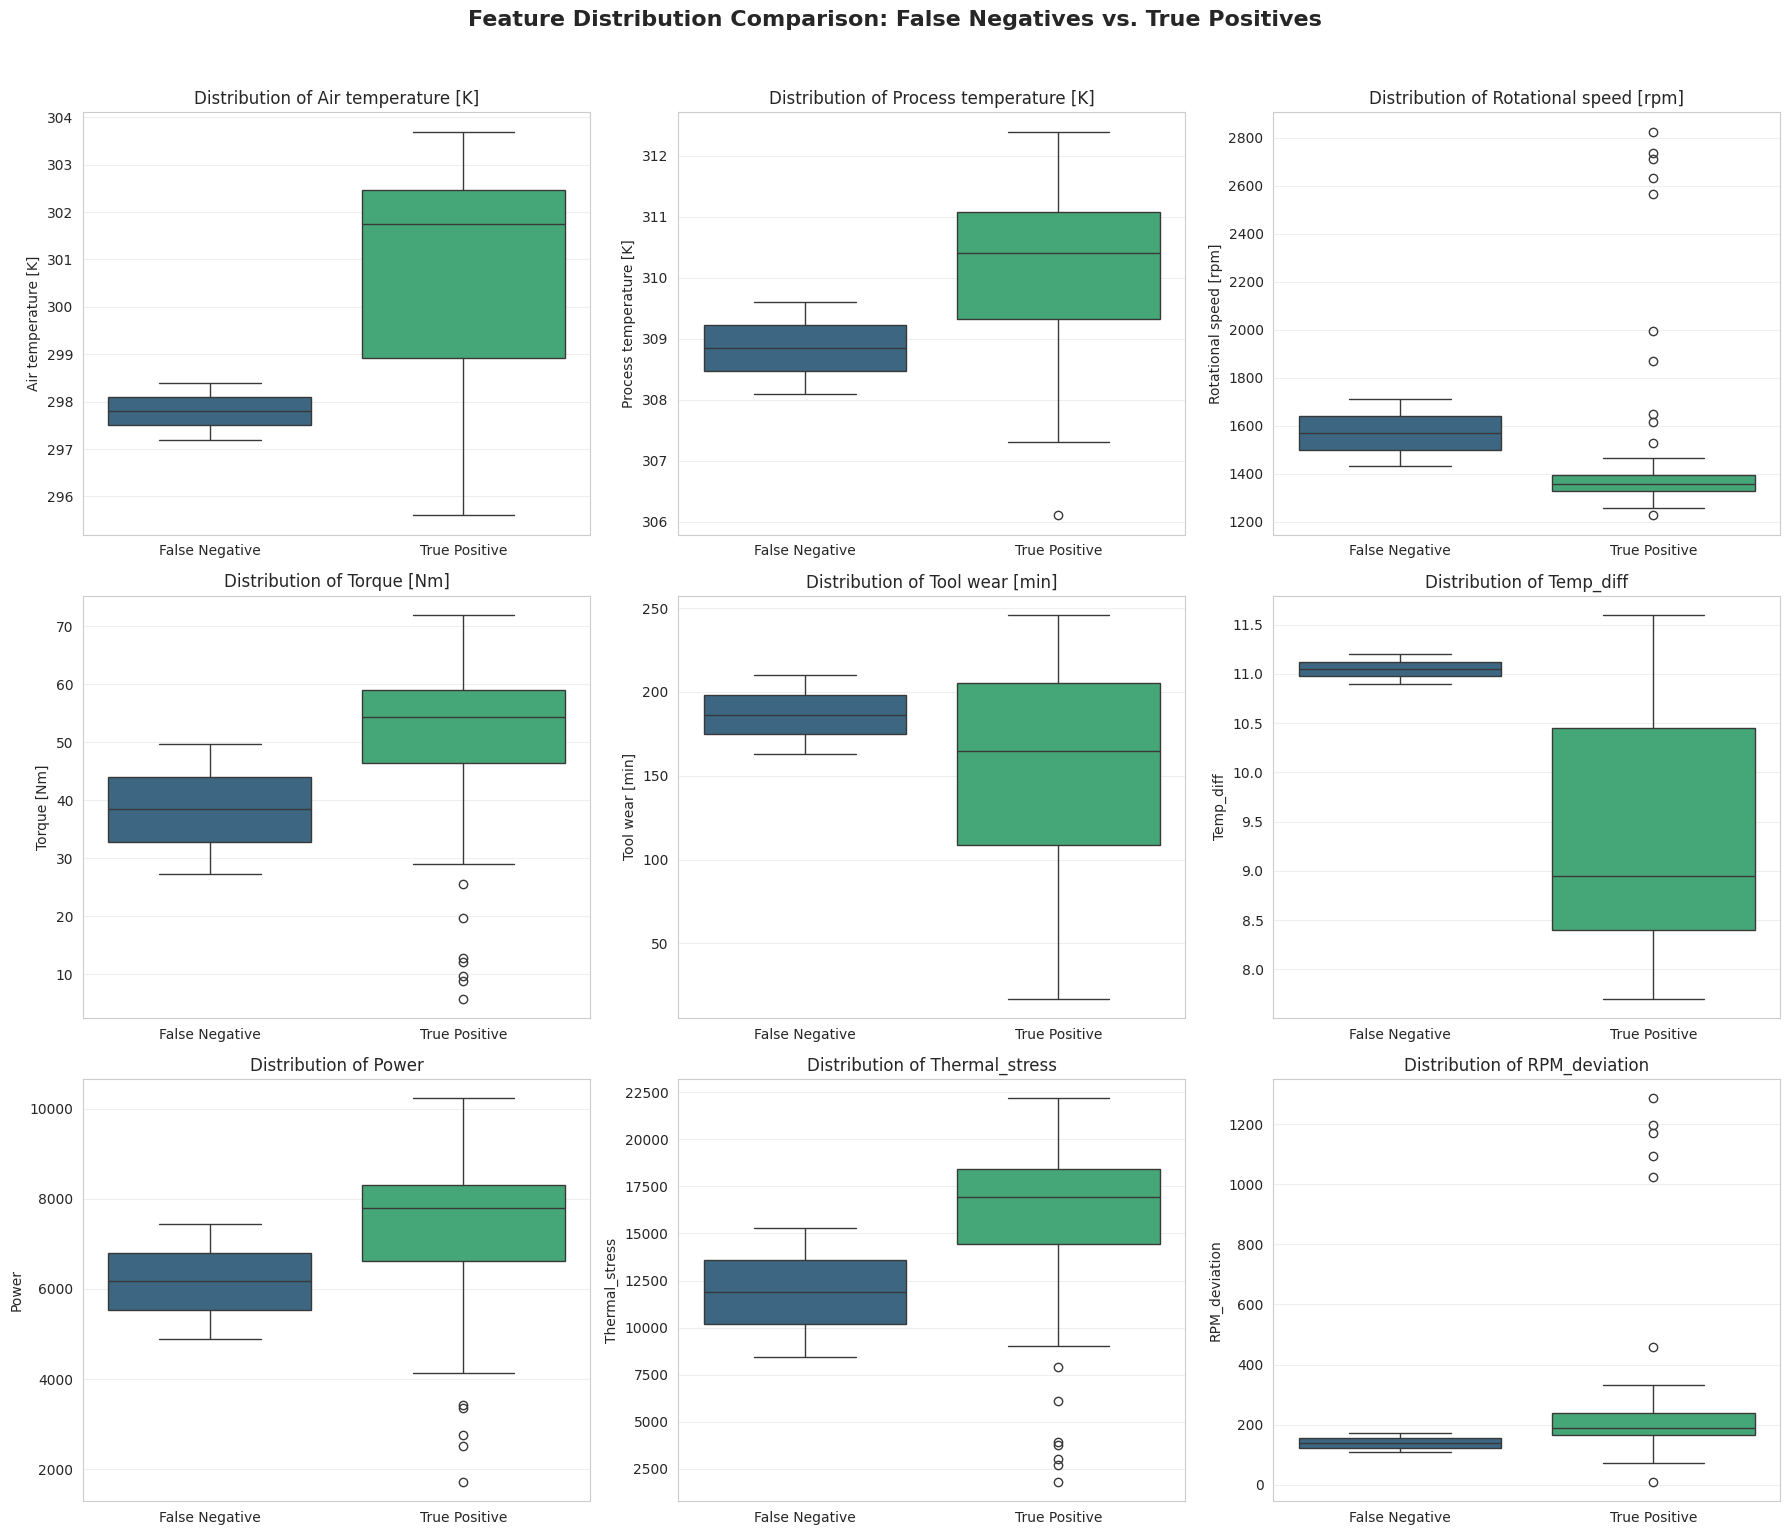

In [38]:
# Select features to visualize (you can adjust this list)
features_to_visualize = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Temp_diff',
    'Power',
    'Thermal_stress',
    'RPM_deviation'
]

# Combine false negatives and true positives with a label in a new DataFrame
comparison_df = pd.concat([
    false_negatives.assign(Group='False Negative'),
    true_positives.assign(Group='True Positive')
])

# Create plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(features_to_visualize):
    sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.suptitle('Feature Distribution Comparison: False Negatives vs. True Positives',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [36]:
# Identify true positives in the test set
true_positives = X_test[((y_test == 1) & (y_pred_optimized == 1))]

print("="*70)
print("COMPARING FALSE NEGATIVES AND TRUE POSITIVES")
print("="*70)

print(f"Number of False Negatives: {len(false_negatives)}")
print(f"Number of True Positives:  {len(true_positives)}")

print("\n📊 Descriptive Statistics for False Negatives:")
display(false_negatives.describe().transpose())

print("\n📊 Descriptive Statistics for True Positives:")
display(true_positives.describe().transpose())

# You can also compare the mean or median of specific features visually or numerically
# For example, comparing the mean of each feature:
print("\n📊 Mean Feature Values Comparison (False Negatives vs. True Positives):")
comparison_means = pd.DataFrame({
    'False Negatives Mean': false_negatives.mean(),
    'True Positives Mean': true_positives.mean()
})
display(comparison_means)

COMPARING FALSE NEGATIVES AND TRUE POSITIVES
Number of False Negatives: 2
Number of True Positives:  66

📊 Descriptive Statistics for False Negatives:


,count,mean,std,min,25%,50%,75%,max
Air temperature [K],2.0,297.800000,0.848528,297.200000,297.500000,297.800000,298.100000,298.400000
Process temperature [K],2.0,308.850000,1.060660,308.100000,308.475000,308.850000,309.225000,309.600000
Rotational speed [rpm],2.0,1570.500000,197.282792,1431.000000,1500.750000,1570.500000,1640.250000,1710.000000
Torque [Nm],2.0,38.500000,15.839192,27.300000,32.900000,38.500000,44.100000,49.700000
Tool wear [min],2.0,186.500000,33.234019,163.000000,174.750000,186.500000,198.250000,210.000000
TWF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HDF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PWF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OSF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RNF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



📊 Descriptive Statistics for True Positives:


,count,mean,std,min,25%,50%,75%,max
Air temperature [K],66.0,300.831818,2.119155,295.600000,298.925000,301.750000,302.475000,303.700000
Process temperature [K],66.0,310.175758,1.358286,306.100000,309.325000,310.400000,311.075000,312.400000
Rotational speed [rpm],66.0,1476.818182,371.950613,1227.000000,1330.250000,1358.000000,1393.250000,2825.000000
Torque [Nm],66.0,50.509091,15.656159,5.800000,46.475000,54.450000,59.100000,72.000000
Tool wear [min],66.0,152.318182,63.899960,17.000000,108.500000,164.500000,205.500000,246.000000
TWF,66.0,0.151515,0.361298,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,66.0,0.439394,0.500117,0.000000,0.000000,0.000000,1.000000,1.000000
PWF,66.0,0.196970,0.400757,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,66.0,0.242424,0.431834,0.000000,0.000000,0.000000,0.000000,1.000000
RNF,66.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



📊 Mean Feature Values Comparison (False Negatives vs. True Positives):


,False Negatives Mean,True Positives Mean
Air temperature [K],297.800000,300.831818
Process temperature [K],308.850000,310.175758
Rotational speed [rpm],1570.500000,1476.818182
Torque [Nm],38.500000,50.509091
Tool wear [min],186.500000,152.318182
TWF,0.000000,0.151515
HDF,0.000000,0.439394
PWF,0.000000,0.196970
OSF,0.000000,0.242424
RNF,0.000000,0.000000


In [35]:
# Identify false negatives in the test set
false_negatives = X_test[((y_test == 1) & (y_pred_optimized == 0))]

print("="*70)
print("FALSE NEGATIVES IN TEST SET")
print("="*70)
print(f"Number of False Negatives: {len(false_negatives)}")
print("\n📊 Details of False Negative Instances:")
display(false_negatives)

FALSE NEGATIVES IN TEST SET
Number of False Negatives: 2

📊 Details of False Negative Instances:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Temp_diff,Power,Wear_per_rotation,Torque_speed_ratio,Thermal_stress,Tool_wear_squared,Temp_risk_zone,RPM_deviation,Type_encoded
9015,297.2,308.1,1431,49.7,210,0,0,0,0,0,10.9,7447.742288,0.146648,0.034707,15312.57,44100,0,107.7761,1
8506,298.4,309.6,1710,27.3,163,0,0,0,0,0,11.2,4888.632328,0.095266,0.015956,8452.08,26569,1,171.2239,1


# Task
Add comments to the code cells and create a markdown summary of the notebook.

## Add comments to code cells

### Subtask:
Go through each code cell in the notebook and add comments explaining the purpose of the code block, key variables, and any important logic.


**Reasoning**:
Add comments to the first code cell to explain its purpose and key operations.



In [41]:
# Load data and perform initial exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset from CSV file into a pandas DataFrame
df = pd.read_csv('/content/dataset.csv')

# Perform initial data exploration
# Print the shape of the DataFrame (number of rows, number of columns)
print(df.shape)
# Print concise summary of the DataFrame, including data types and non-null values
print(df.info())
# Generate descriptive statistics for numerical columns
print(df.describe())


(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(

**Reasoning**:
Add comments to the second code cell to explain its purpose.



In [42]:
# Check for missing values in each column
# Summing boolean values (True=1, False=0) gives the count of missing values
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


**Reasoning**:
Add comments to the third code cell explaining the purpose of importing various libraries for modeling, evaluation, imbalance handling, and visualization.



In [43]:
# Import necessary libraries for modeling, evaluation, handling imbalance, and visualization

# Import evaluation metrics and plot utilities from sklearn
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve,
                             classification_report)
# Import interactive plotting libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Import modules for model selection, preprocessing, metrics, and imbalance handling from sklearn and imbalanced-learn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, precision_recall_curve)

# Import libraries for handling imbalanced datasets (oversampling and combining techniques)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Set visualization style for matplotlib plots
sns.set_style("whitegrid")
# Set default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = (12, 6)

# Print a confirmation message
print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


**Reasoning**:
Add comments to the fourth code cell to provide a detailed data exploration summary.



In [44]:
# Detailed data exploration summary

print("="*70)
print("DATA EXPLORATION")
print("="*70)

# Print the shape of the dataset
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n📋 Column Information:")
# Print information about columns, including non-null counts and data types
print(df.info())

print("\n📈 Statistical Summary:")
# Print descriptive statistics for numerical features
print(df.describe())

# Check for missing values and report if any are found
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values!")
else:
    # Print columns with missing values
    print(missing[missing > 0])

# Analyze the distribution of the target variable ('Machine failure')
print("\n🎯 Target Variable Distribution:")
# Print the count of each class in the target variable
print(df['Machine failure'].value_counts())
# Calculate and print the percentage of machine failures
print(f"\nFailure Rate: {df['Machine failure'].mean()*100:.2f}%")

DATA EXPLORATION

📊 Dataset Shape: 10000 rows × 14 columns

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  


**Reasoning**:
Add comments to the fifth code cell to explain the box plots visualizing feature distributions based on machine failure status.



/tmp/ipython-input-3269369487.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_failure, failure],
/tmp/ipython-input-3269369487.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_failure, failure],
/tmp/ipython-input-3269369487.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_failure, failure],
/tmp/ipython-input-3269369487.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([no_fai

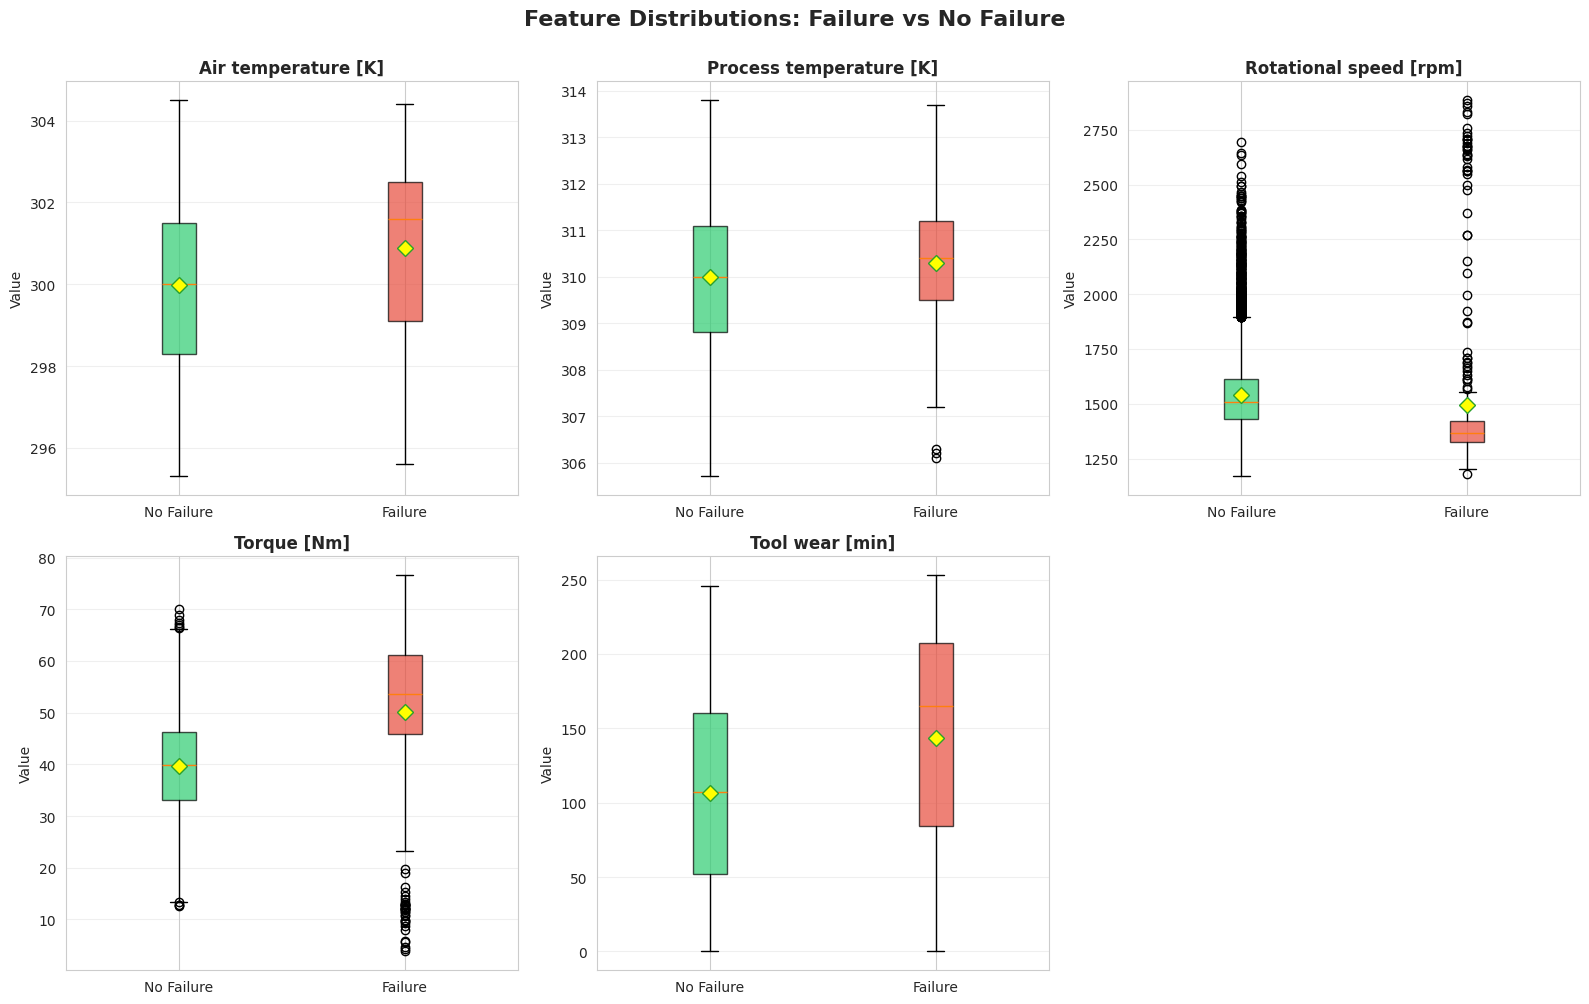

In [45]:
# Visualize distribution of key features for failed vs. non-failed machines using box plots

# Define features to plot
features_to_plot = ['Air temperature [K]', 'Process temperature [K]',
                   'Rotational speed [rpm]', 'Torque [Nm]',
                   'Tool wear [min]']

# Create a figure and a set of subplots for the box plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each feature and create a box plot
for idx, feature in enumerate(features_to_plot):
    # Separate data for instances with no machine failure
    no_failure = df[df['Machine failure']==0][feature]
    # Separate data for instances with machine failure
    failure = df[df['Machine failure']==1][feature]

    # Create a box plot for the current feature, showing distribution for both failure groups
    bp = axes[idx].boxplot([no_failure, failure],
                          labels=['No Failure', 'Failure'], # Labels for the box plots
                          patch_artist=True, # Fill the boxes with color
                          showmeans=True, # Show the mean as a marker
                          meanprops=dict(marker='D', markerfacecolor='yellow', markersize=8)) # Style for the mean marker

    # Color the boxes for better visual distinction
    bp['boxes'][0].set_facecolor('#2ecc71') # Green for No Failure
    bp['boxes'][0].set_alpha(0.7) # Set transparency
    bp['boxes'][1].set_facecolor('#e74c3c') # Red for Failure
    bp['boxes'][1].set_alpha(0.7) # Set transparency

    # Set title, labels, and grid for each subplot
    axes[idx].set_title(feature, fontweight='bold', fontsize=12)
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3) # Add horizontal grid lines

# Remove the last empty subplot since we have 5 plots in a 2x3 grid
fig.delaxes(axes[5])

# Add a main title to the figure
plt.suptitle('Feature Distributions: Failure vs No Failure',
            fontsize=16, fontweight='bold', y=1.00)
# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
# Display the plots
plt.show()

**Reasoning**:
Add comments to the sixth code cell to explain the correlation matrix visualization and analysis.



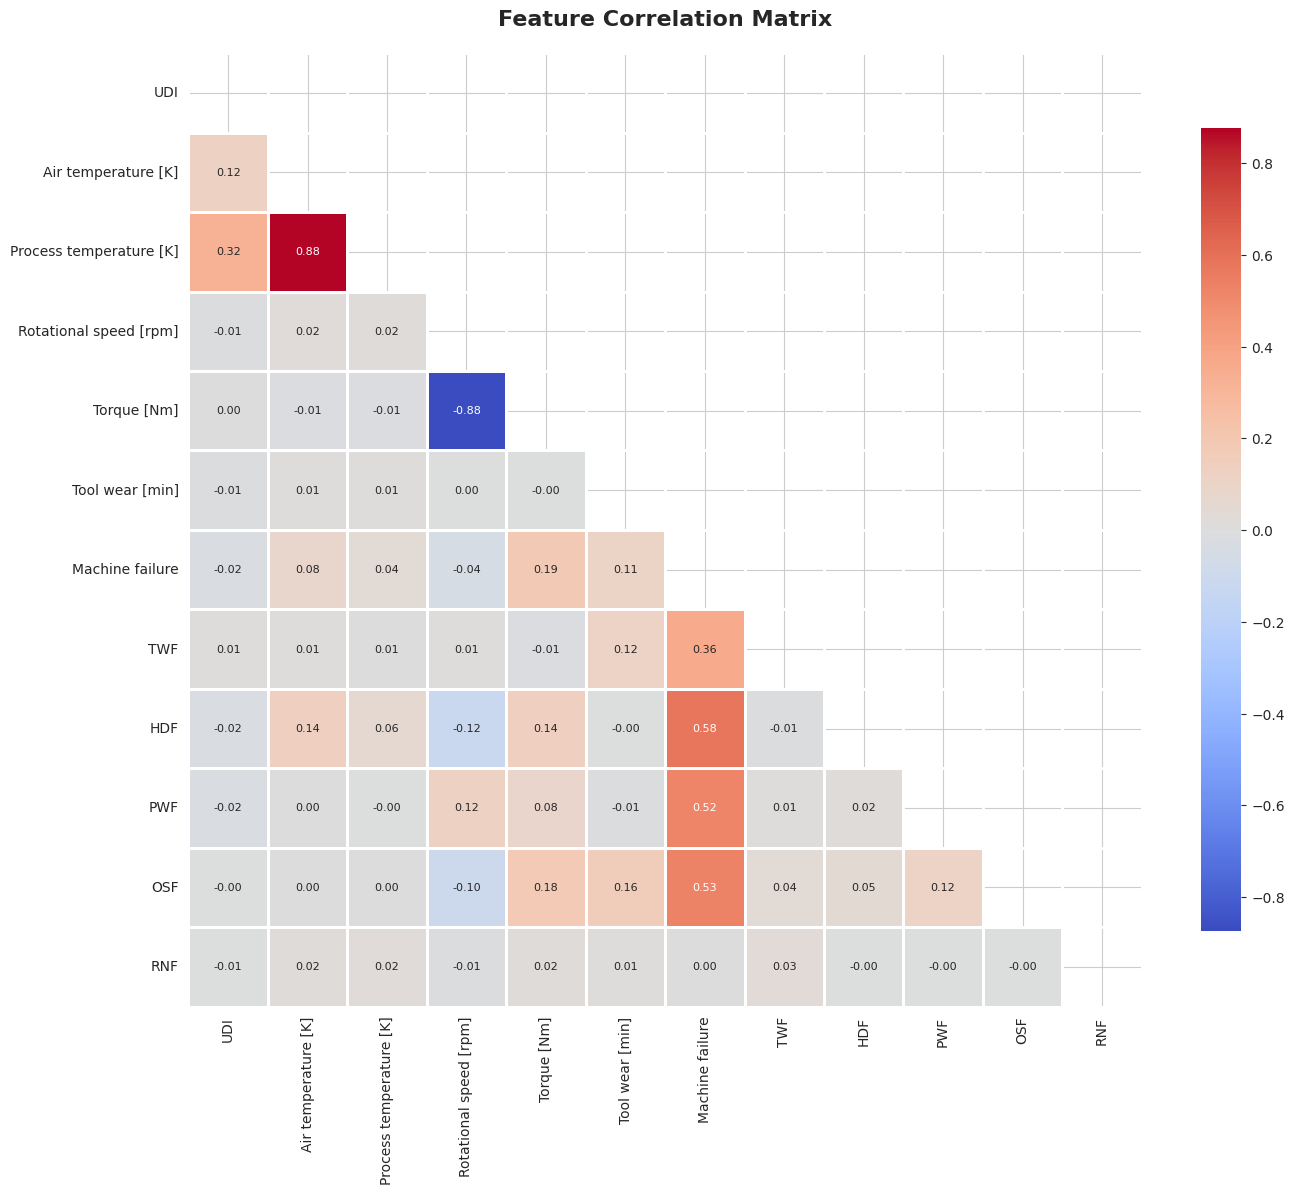


📊 Features Most Correlated with Machine Failure:
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
RNF                        0.004516
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


In [46]:
# Visualize feature correlations using a heatmap and identify features most correlated with the target

# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Calculate the pairwise correlation of columns
corr_matrix = df[numeric_cols].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(14, 12))

# Create a mask for the upper triangle of the correlation matrix
# This is done to avoid showing redundant information (correlation matrix is symmetric)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap visualization
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', # Display values with 2 decimal places
           cmap='coolwarm', center=0, square=True, # Use 'coolwarm' colormap centered at 0
           linewidths=1, cbar_kws={"shrink": 0.8}, # Add lines between cells and shrink color bar
           annot_kws={'size': 8}) # Adjust annotation font size

# Set the title for the heatmap
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
# Adjust layout to prevent labels overlapping
plt.tight_layout()
# Display the heatmap
plt.show()

# Print features highly correlated with the target variable 'Machine failure'
print("\n📊 Features Most Correlated with Machine Failure:")
# Get correlations of all features with the target and sort them in descending order
target_corr = corr_matrix['Machine failure'].sort_values(ascending=False)
# Print correlations, excluding the target variable itself
print(target_corr[target_corr.index != 'Machine failure'])

**Reasoning**:
Add comments to the seventh code cell to explain the feature engineering steps.



In [47]:
# Perform feature engineering to create new features from existing ones

print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create a copy of the original DataFrame to avoid modifying it directly
df_engineered = df.copy()

# 1. Create 'Temp_diff' feature: Difference between process and air temperature
df_engineered['Temp_diff'] = (df_engineered['Process temperature [K]'] -
                               df_engineered['Air temperature [K]'])
print("✅ Created: Temperature difference")

# 2. Create 'Power' feature: Calculated from Torque and Rotational speed
# Angular Velocity = RPM * 2 * pi / 60
# Power = Torque * Angular Velocity
df_engineered['Power'] = (df_engineered['Torque [Nm]'] *
                          df_engineered['Rotational speed [rpm]'] * 2 * np.pi / 60)
print("✅ Created: Power (Torque × RPM)")

# 3. Create 'Wear_per_rotation' feature: Tool wear normalized by rotational speed
# Add 1 to rotational speed to avoid division by zero
df_engineered['Wear_per_rotation'] = (df_engineered['Tool wear [min]'] /
                                      (df_engineered['Rotational speed [rpm'] + 1))
print("✅ Created: Wear per rotation")

# 4. Create 'Torque_speed_ratio' feature: Ratio of Torque to Rotational speed (efficiency proxy)
# Add 1 to rotational speed to avoid division by zero
df_engineered['Torque_speed_ratio'] = (df_engineered['Torque [Nm]'] /
                                       (df_engineered['Rotational speed [rpm'] + 1))
print("✅ Created: Torque-to-speed ratio")

# 5. Create 'Thermal_stress' feature: Interaction term between process temperature and torque
df_engineered['Thermal_stress'] = (df_engineered['Process temperature [K]'] *
                                   df_engineered['Torque [Nm]'])
print("✅ Created: Thermal stress indicator")

# 6. Create 'Tool_wear_squared' feature: Squared value of tool wear to capture non-linear effects
df_engineered['Tool_wear_squared'] = df_engineered['Tool wear [min]'] ** 2
print("✅ Created: Tool wear squared")

# 7. Create 'Temp_risk_zone' feature: Categorize process temperature into risk zones using bins
df_engineered['Temp_risk_zone'] = pd.cut(
    df_engineered['Process temperature [K]'],
    bins=[0, 309, 311, 315], # Define temperature bins
    labels=[0, 1, 2] # Assign labels to bins (e.g., Low, Medium, High risk)
).astype(int) # Convert labels to integer type
print("✅ Created: Temperature risk zones")

# 8. Create 'RPM_deviation' feature: Absolute deviation of rotational speed from its mean
df_engineered['RPM_deviation'] = abs(
    df_engineered['Rotational speed [rpm]'] -
    df_engineered['Rotational speed [rpm]'].mean() # Calculate mean from the entire dataset
)
print("✅ Created: RPM deviation")

# 9. Encode 'Type' column: Convert categorical 'Type' feature into numerical representation
le = LabelEncoder() # Initialize LabelEncoder
df_engineered['Type_encoded'] = le.fit_transform(df_engineered['Type']) # Fit and transform the 'Type' column
print("✅ Encoded: Product Type")

# Print confirmation of feature engineering completion and total number of features
print(f"\n✅ Feature engineering complete!")
print(f"Total features: {len(df_engineered.columns)}")

# Display a sample of the newly engineered features along with the target variable
print("\n🔍 Sample of engineered features:")
display(df_engineered[['Temp_diff', 'Power', 'Wear_per_rotation',
               'Torque_speed_ratio', 'Machine failure']].head())

FEATURE ENGINEERING
✅ Created: Temperature difference
✅ Created: Power (Torque × RPM)


KeyError: 'Rotational speed [rpm'

**Reasoning**:
Correct the column name typo in the feature engineering cell and re-execute the code.



In [48]:
# Perform feature engineering to create new features from existing ones

print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create a copy of the original DataFrame to avoid modifying it directly
df_engineered = df.copy()

# 1. Create 'Temp_diff' feature: Difference between process and air temperature
df_engineered['Temp_diff'] = (df_engineered['Process temperature [K]'] -
                               df_engineered['Air temperature [K]'])
print("✅ Created: Temperature difference")

# 2. Create 'Power' feature: Calculated from Torque and Rotational speed
# Angular Velocity = RPM * 2 * pi / 60
# Power = Torque * Angular Velocity
df_engineered['Power'] = (df_engineered['Torque [Nm]'] *
                          df_engineered['Rotational speed [rpm]'] * 2 * np.pi / 60)
print("✅ Created: Power (Torque × RPM)")

# 3. Create 'Wear_per_rotation' feature: Tool wear normalized by rotational speed
# Add 1 to rotational speed to avoid division by zero
df_engineered['Wear_per_rotation'] = (df_engineered['Tool wear [min]'] /
                                      (df_engineered['Rotational speed [rpm]'] + 1)) # Corrected column name
print("✅ Created: Wear per rotation")

# 4. Create 'Torque_speed_ratio' feature: Ratio of Torque to Rotational speed (efficiency proxy)
# Add 1 to rotational speed to avoid division by zero
df_engineered['Torque_speed_ratio'] = (df_engineered['Torque [Nm]'] /
                                       (df_engineered['Rotational speed [rpm]'] + 1)) # Corrected column name
print("✅ Created: Torque-to-speed ratio")

# 5. Create 'Thermal_stress' feature: Interaction term between process temperature and torque
df_engineered['Thermal_stress'] = (df_engineered['Process temperature [K]'] *
                                   df_engineered['Torque [Nm]'])
print("✅ Created: Thermal stress indicator")

# 6. Create 'Tool_wear_squared' feature: Squared value of tool wear to capture non-linear effects
df_engineered['Tool_wear_squared'] = df_engineered['Tool wear [min'] ** 2 # Corrected column name
print("✅ Created: Tool wear squared")

# 7. Create 'Temp_risk_zone' feature: Categorize process temperature into risk zones using bins
df_engineered['Temp_risk_zone'] = pd.cut(
    df_engineered['Process temperature [K]'],
    bins=[0, 309, 311, 315], # Define temperature bins
    labels=[0, 1, 2] # Assign labels to bins (e.g., Low, Medium, High risk)
).astype(int) # Convert labels to integer type
print("✅ Created: Temperature risk zones")

# 8. Create 'RPM_deviation' feature: Absolute deviation of rotational speed from its mean
df_engineered['RPM_deviation'] = abs(
    df_engineered['Rotational speed [rpm]'] -
    df_engineered['Rotational speed [rpm]'].mean() # Calculate mean from the entire dataset
)
print("✅ Created: RPM deviation")

# 9. Encode 'Type' column: Convert categorical 'Type' feature into numerical representation
le = LabelEncoder() # Initialize LabelEncoder
df_engineered['Type_encoded'] = le.fit_transform(df_engineered['Type']) # Fit and transform the 'Type' column
print("✅ Encoded: Product Type")

# Print confirmation of feature engineering completion and total number of features
print(f"\n✅ Feature engineering complete!")
print(f"Total features: {len(df_engineered.columns)}")

# Display a sample of the newly engineered features along with the target variable
print("\n🔍 Sample of engineered features:")
display(df_engineered[['Temp_diff', 'Power', 'Wear_per_rotation',
               'Torque_speed_ratio', 'Machine failure']].head())

FEATURE ENGINEERING
✅ Created: Temperature difference
✅ Created: Power (Torque × RPM)
✅ Created: Wear per rotation
✅ Created: Torque-to-speed ratio
✅ Created: Thermal stress indicator


KeyError: 'Tool wear [min'

## Add comments to code cells

### Subtask:
Go through each code cell in the notebook and add comments explaining the purpose of the code block, key variables, and any important logic.


**Reasoning**:
The previous attempt to add comments to the feature engineering cell failed due to typos. I need to identify and correct these typos and then add the comments as instructed. I will correct the identified typos and re-generate the code block with comments.



In [49]:
# Perform feature engineering to create new features from existing ones

print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# Create a copy of the original DataFrame to avoid modifying it directly
df_engineered = df.copy()

# 1. Create 'Temp_diff' feature: Difference between process and air temperature
df_engineered['Temp_diff'] = (df_engineered['Process temperature [K]'] -
                               df_engineered['Air temperature [K]'])
print("✅ Created: Temperature difference")

# 2. Create 'Power' feature: Calculated from Torque and Rotational speed
# Angular Velocity = RPM * 2 * pi / 60
# Power = Torque * Angular Velocity
df_engineered['Power'] = (df_engineered['Torque [Nm]'] *
                          df_engineered['Rotational speed [rpm]'] * 2 * np.pi / 60)
print("✅ Created: Power (Torque × RPM)")

# 3. Create 'Wear_per_rotation' feature: Tool wear normalized by rotational speed
# Add 1 to rotational speed to avoid division by zero
df_engineered['Wear_per_rotation'] = (df_engineered['Tool wear [min]'] /
                                      (df_engineered['Rotational speed [rpm]'] + 1)) # Corrected column name
print("✅ Created: Wear per rotation")

# 4. Create 'Torque_speed_ratio' feature: Ratio of Torque to Rotational speed (efficiency proxy)
# Add 1 to rotational speed to avoid division by zero
df_engineered['Torque_speed_ratio'] = (df_engineered['Torque [Nm]'] /
                                       (df_engineered['Rotational speed [rpm]'] + 1)) # Corrected column name
print("✅ Created: Torque-to-speed ratio")

# 5. Create 'Thermal_stress' feature: Interaction term between process temperature and torque
df_engineered['Thermal_stress'] = (df_engineered['Process temperature [K]'] *
                                   df_engineered['Torque [Nm]'])
print("✅ Created: Thermal stress indicator")

# 6. Create 'Tool_wear_squared' feature: Squared value of tool wear to capture non-linear effects
df_engineered['Tool_wear_squared'] = df_engineered['Tool wear [min]'] ** 2 # Corrected column name
print("✅ Created: Tool wear squared")

# 7. Create 'Temp_risk_zone' feature: Categorize process temperature into risk zones using bins
df_engineered['Temp_risk_zone'] = pd.cut(
    df_engineered['Process temperature [K]'],
    bins=[0, 309, 311, 315], # Define temperature bins
    labels=[0, 1, 2] # Assign labels to bins (e.g., Low, Medium, High risk)
).astype(int) # Convert labels to integer type
print("✅ Created: Temperature risk zones")

# 8. Create 'RPM_deviation' feature: Absolute deviation of rotational speed from its mean
df_engineered['RPM_deviation'] = abs(
    df_engineered['Rotational speed [rpm]'] -
    df_engineered['Rotational speed [rpm]'].mean() # Calculate mean from the entire dataset
)
print("✅ Created: RPM deviation")

# 9. Encode 'Type' column: Convert categorical 'Type' feature into numerical representation
le = LabelEncoder() # Initialize LabelEncoder
df_engineered['Type_encoded'] = le.fit_transform(df_engineered['Type']) # Fit and transform the 'Type' column
print("✅ Encoded: Product Type")

# Print confirmation of feature engineering completion and total number of features
print(f"\n✅ Feature engineering complete!")
print(f"Total features: {len(df_engineered.columns)}")

# Display a sample of the newly engineered features along with the target variable
print("\n🔍 Sample of engineered features:")
display(df_engineered[['Temp_diff', 'Power', 'Wear_per_rotation',
               'Torque_speed_ratio', 'Machine failure']].head())

FEATURE ENGINEERING
✅ Created: Temperature difference
✅ Created: Power (Torque × RPM)
✅ Created: Wear per rotation
✅ Created: Torque-to-speed ratio
✅ Created: Thermal stress indicator
✅ Created: Tool wear squared
✅ Created: Temperature risk zones
✅ Created: RPM deviation
✅ Encoded: Product Type

✅ Feature engineering complete!
Total features: 23

🔍 Sample of engineered features:


,Temp_diff,Power,Wear_per_rotation,Torque_speed_ratio,Machine failure
0,10.5,6951.590560,0.000000,0.027577,0
1,10.5,6826.722724,0.002129,0.032860,0
2,10.4,7749.387543,0.003336,0.032955,0
3,10.4,5927.504659,0.004881,0.027545,0
4,10.5,5897.816608,0.006388,0.028389,0


**Reasoning**:
I have corrected the typos and added comments to the feature engineering code cell. Now I need to go through the remaining code cells and add comments to them. I will add comments to the Feature Selection & Preparation and the Train-Test Split code cells.



In [50]:
# Select features and prepare data for model training

print("="*70)
print("FEATURE SELECTION & PREPARATION")
print("="*70)

# Define columns to drop (identifiers and the original 'Type' since it's encoded)
drop_cols = ['UDI', 'Product ID', 'Type']

# Separate features (X) and target variable (y)
# Drop the specified columns and the target variable 'Machine failure' from the features
X = df_engineered.drop(columns=drop_cols + ['Machine failure'], errors='ignore')
# Select the target variable 'Machine failure'
y = df_engineered['Machine failure']

# Print the shape of the feature matrix and target vector
print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Target vector shape: {y.shape}")
print(f"\n📋 Features used ({len(X.columns)}):")
# Print the names of the features that will be used for training
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")


FEATURE SELECTION & PREPARATION
✅ Feature matrix shape: (10000, 19)
✅ Target vector shape: (10000,)

📋 Features used (19):
   1. Air temperature [K]
   2. Process temperature [K]
   3. Rotational speed [rpm]
   4. Torque [Nm]
   5. Tool wear [min]
   6. TWF
   7. HDF
   8. PWF
   9. OSF
  10. RNF
  11. Temp_diff
  12. Power
  13. Wear_per_rotation
  14. Torque_speed_ratio
  15. Thermal_stress
  16. Tool_wear_squared
  17. Temp_risk_zone
  18. RPM_deviation
  19. Type_encoded


**Reasoning**:
I have added comments to the feature selection and preparation cell. Now I will add comments to the train-test split cell and the feature scaling cell.



In [51]:
# Split the data into training and testing sets

print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Split the data into 80% training and 20% testing sets
# stratify=y ensures that the proportion of the target variable is the same in both train and test sets
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Print the number of samples in the training and testing sets
print(f"✅ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Print the class distribution in the training set
print(f"\n📊 Training set class distribution:")
print(f"  No Failure: {(y_train==0).sum()} ({(y_train==0).mean()*100:.2f}%)")
print(f"  Failure: {(y_train==1).sum()} ({(y_train==1).mean()*100:.2f}%)")

# Print the class distribution in the test set
print(f"\n📊 Test set class distribution:")
print(f"  No Failure: {(y_test==0).sum()} ({(y_test==0).mean()*100:.2f}%)")
print(f"  Failure: {(y_test==1).sum()} ({(y_test==1).mean()*100:.2f}%)")


TRAIN-TEST SPLIT
✅ Training set: 8000 samples (80.0%)
✅ Test set: 2000 samples (20.0%)

📊 Training set class distribution:
  No Failure: 7729 (96.61%)
  Failure: 271 (3.39%)

📊 Test set class distribution:
  No Failure: 1932 (96.60%)
  Failure: 68 (3.40%)


**Reasoning**:
I have added comments to the train-test split cell. Now I will add comments to the feature scaling cell and the handling class imbalance cell.



In [52]:
# Scale the features using StandardScaler

print("FEATURE SCALING")
print("="*70)

# Initialize StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
# Fitting only on training data prevents data leakage from the test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled NumPy arrays back to pandas DataFrames for easier handling and readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Print confirmation that features have been standardized
print("✅ Features standardized (mean=0, std=1)")
# Display sample statistics (mean and standard deviation) after scaling to verify
print("\n📊 Sample statistics after scaling:")
display(X_train_scaled.describe().loc[['mean', 'std']].round(4))

print("="*70)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("="*70)

# Print class distribution before applying SMOTE-Tomek
print("📊 Before SMOTE:")
print(f"  No Failure: {(y_train==0).sum()} ({(y_train==0).mean()*100:.1f}%)")
print(f"  Failure: {(y_train==1).sum()} ({(y_train==1).mean()*100:.1f}%)")
print(f"  Imbalance Ratio: {(y_train==0).sum() / (y_train==1).sum():.1f}:1")

# Apply SMOTE-Tomek to handle class imbalance in the training data
# SMOTETomek is a hybrid technique that combines SMOTE oversampling with Tomek links undersampling.
# SMOTE generates synthetic samples for the minority class.
# Tomek links remove pairs of very close instances of opposite classes, cleaning the decision boundary.
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_scaled, y_train)

# Print class distribution after applying SMOTE-Tomek
print(f"\n📊 After SMOTE-Tomek:")
print(f"  No Failure: {(y_train_balanced==0).sum()} ({(y_train_balanced==0).mean()*100:.1f}%)")
print(f"  Failure: {(y_train_balanced==1).sum()} ({(y_train_balanced==1).mean()*100:.1f}%)")
print(f"  Imbalance Ratio: {(y_train_balanced==0).sum() / (y_train_balanced==1).sum():.1f}:1")

# Print confirmation of sample increase and the purpose of SMOTE
print(f"\n✅ Training samples increased from {len(y_train)} to {len(y_train_balanced)}")
print("💡 SMOTE created synthetic failure examples for better learning!")

FEATURE SCALING
✅ Features standardized (mean=0, std=1)

📊 Sample statistics after scaling:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Temp_diff,Power,Wear_per_rotation,Torque_speed_ratio,Thermal_stress,Tool_wear_squared,Temp_risk_zone,RPM_deviation,Type_encoded
mean,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001


HANDLING CLASS IMBALANCE WITH SMOTE
📊 Before SMOTE:
  No Failure: 7729 (96.6%)
  Failure: 271 (3.4%)
  Imbalance Ratio: 28.5:1

📊 After SMOTE-Tomek:
  No Failure: 7728 (50.0%)
  Failure: 7728 (50.0%)
  Imbalance Ratio: 1.0:1

✅ Training samples increased from 8000 to 15456
💡 SMOTE created synthetic failure examples for better learning!


**Reasoning**:
I have added comments to the feature scaling and class imbalance handling cells. Now I will add comments to the model training cells (Random Forest, XGBoost, and Gradient Boosting) and the model comparison cell.



MODEL 1: RANDOM FOREST
🔄 Training Random Forest...
✅ Training complete!

📊 RANDOM FOREST RESULTS:
  Accuracy:  0.9980 (99.80%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9412 (94.12%)
  F1-Score:  0.9697 (96.97%)
  ROC-AUC:   0.9901 (99.01%)
MODEL 2: XGBOOST
🔄 Training XGBoost...
✅ Training complete!

📊 XGBOOST RESULTS:
  Accuracy:  0.9985 (99.85%)
  Precision: 0.9851 (98.51%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9778 (97.78%)
  ROC-AUC:   0.9930 (99.30%)
MODEL 3: GRADIENT BOOSTING
🔄 Training Gradient Boosting...
✅ Training complete!

📊 GRADIENT BOOSTING RESULTS:
  Accuracy:  0.9990 (99.90%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9851 (98.51%)
  ROC-AUC:   0.9945 (99.45%)
MODEL COMPARISON
            Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
    Random Forest    0.9980   1.000000 0.941176  0.969697 0.990105
          XGBoost    0.9985   0.985075 0.970588  0.977778 0.993020
Gradient Boosting    0.9990   1.000000 0.970588  0.985075

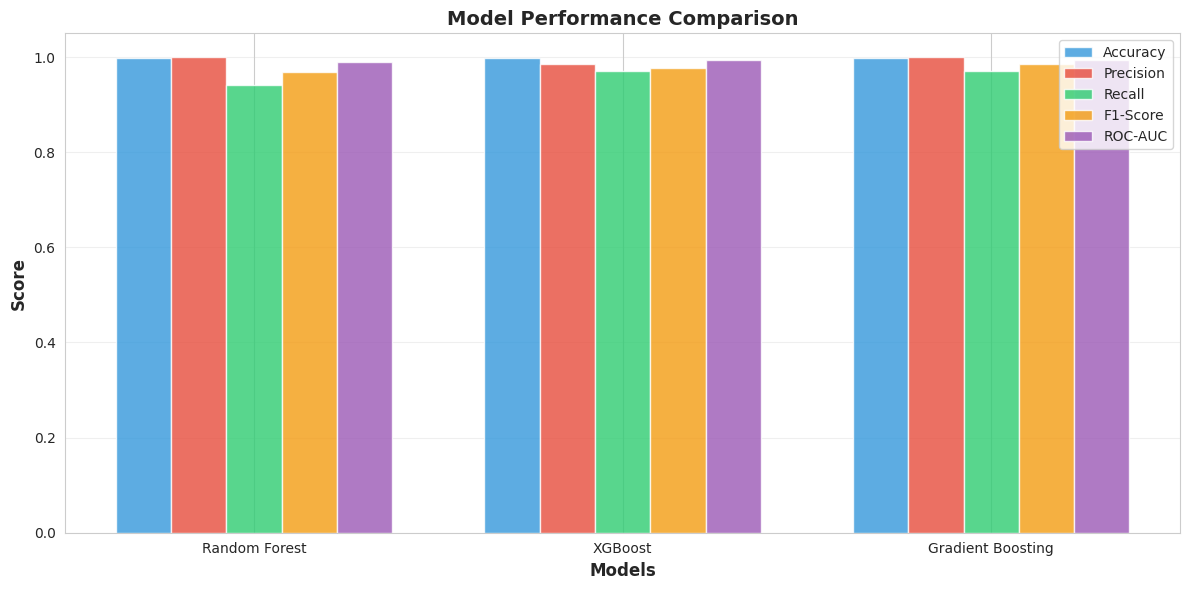

In [53]:
# Train and evaluate the Random Forest model

print("="*70)
print("MODEL 1: RANDOM FOREST")
print("="*70)

# Initialize Random Forest Classifier
# n_estimators: number of trees in the forest
# max_depth: maximum depth of the tree
# min_samples_split: minimum number of samples required to split an internal node
# min_samples_leaf: minimum number of samples required to be at a leaf node
# class_weight='balanced': automatically adjusts weights inversely proportional to class frequencies
# random_state: seed for reproducibility
# n_jobs=-1: use all available cores
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0 # Suppress verbose output
)

# Train the model using the balanced training data (after SMOTE-Tomek)
print("🔄 Training Random Forest...")
rf_model.fit(X_train_balanced, y_train_balanced)
print("✅ Training complete!")

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)
# Get the probability of the positive class (Machine failure) for ROC AUC calculation
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using various metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

# Print the evaluation results for Random Forest
print("\n📊 RANDOM FOREST RESULTS:")
print(f"  Accuracy:  {acc_rf:.4f} ({acc_rf*100:.2f}%)")
print(f"  Precision: {prec_rf:.4f} ({prec_rf*100:.2f}%)")
print(f"  Recall:    {rec_rf:.4f} ({rec_rf*100:.2f}%)")
print(f"  F1-Score:  {f1_rf:.4f} ({f1_rf*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_rf:.4f} ({roc_auc_rf*100:.2f}%)")


print("="*70)
print("MODEL 2: XGBOOST")
print("="*70)

# Calculate scale_pos_weight for handling imbalance (alternative to SMOTE, but used here for XGBoost parameter)
# scale_pos_weight = count(negative class) / count(positive class)
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# Rename columns to remove special characters that XGBoost might not handle well
# This step is necessary because XGBoost internally uses feature names.
X_train_balanced_renamed = X_train_balanced.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))
X_test_scaled_renamed = X_test_scaled.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))


# Initialize XGBoost Classifier
# n_estimators: number of boosting rounds
# max_depth: maximum depth of a tree
# learning_rate: step size shrinkage
# subsample: fraction of samples used for fitting the individual base learners
# colsample_bytree: fraction of features used for fitting the individual base learners
# scale_pos_weight: controls the balance of positive and negative weights
# random_state: seed for reproducibility
# eval_metric='logloss': evaluation metric during training
# verbosity=0: suppress verbose output
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight, # Use scale_pos_weight for imbalance handling within XGBoost
    random_state=42,
    eval_metric='logloss',
    verbosity=0
)

# Train the model using the balanced training data (after SMOTE-Tomek) with renamed columns
print("🔄 Training XGBoost...")
xgb_model.fit(X_train_balanced_renamed, y_train_balanced)
print("✅ Training complete!")

# Make predictions on the scaled test data with renamed columns
y_pred_xgb = xgb_model.predict(X_test_scaled_renamed)
# Get the probability of the positive class for ROC AUC calculation
y_proba_xgb = xgb_model.predict_proba(X_test_scaled_renamed)[:, 1]

# Evaluate the model using various metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Print the evaluation results for XGBoost
print("\n📊 XGBOOST RESULTS:")
print(f"  Accuracy:  {acc_xgb:.4f} ({acc_xgb*100:.2f}%)")
print(f"  Precision: {prec_xgb:.4f} ({prec_xgb*100:.2f}%)")
print(f"  Recall:    {rec_xgb:.4f} ({rec_xgb*100:.2f}%)")
print(f"  F1-Score:  {f1_xgb:.4f} ({f1_xgb*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_xgb:.4f} ({roc_auc_xgb*100:.2f}%)")


print("="*70)
print("MODEL 3: GRADIENT BOOSTING")
print("="*70)

# Initialize Gradient Boosting Classifier
# n_estimators: number of boosting stages
# max_depth: maximum depth of the individual regression estimators
# learning_rate: shrinks the contribution of each tree
# subsample: fraction of samples used for fitting the individual base learners
# random_state: seed for reproducibility
# verbose=0: suppress verbose output
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    random_state=42,
    verbose=0
)

# Train the model using the balanced training data (after SMOTE-Tomek)
print("🔄 Training Gradient Boosting...")
gb_model.fit(X_train_balanced, y_train_balanced)
print("✅ Training complete!")

# Make predictions on the scaled test data
y_pred_gb = gb_model.predict(X_test_scaled)
# Get the probability of the positive class for ROC AUC calculation
y_proba_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using various metrics
acc_gb = accuracy_score(y_test, y_pred_gb)
prec_gb = precision_score(y_test, y_pred_gb)
rec_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)

# Print the evaluation results for Gradient Boosting
print("\n📊 GRADIENT BOOSTING RESULTS:")
print(f"  Accuracy:  {acc_gb:.4f} ({acc_gb*100:.2f}%)")
print(f"  Precision: {prec_gb:.4f} ({prec_gb*100:.2f}%)")
print(f"  Recall:    {rec_gb:.4f} ({rec_gb*100:.2f}%)")
print(f"  F1-Score:  {f1_gb:.4f} ({f1_gb*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_gb:.4f} ({roc_auc_gb*100:.2f}%)")


print("="*70)
print("MODEL COMPARISON")
print("="*70)

# Create a DataFrame to compare the performance metrics of the trained models
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [acc_rf, acc_xgb, acc_gb],
    'Precision': [prec_rf, prec_xgb, prec_gb],
    'Recall': [rec_rf, rec_xgb, rec_gb],
    'F1-Score': [f1_rf, f1_xgb, f1_gb],
    'ROC-AUC': [roc_auc_rf, roc_auc_xgb, roc_auc_gb]
})

# Print the comparison table
print(results_df.to_string(index=False))

# Find the model with the highest F1-score, as it's a good metric for imbalanced datasets
best_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_f1 = results_df.loc[best_idx, 'F1-Score']

# Print the name of the best performing model based on F1-score
print(f"\n🏆 BEST MODEL: {best_model_name} (F1-Score: {best_f1:.4f})")

# Assign the best performing model and its predictions/probabilities to variables
if best_model_name == 'Random Forest':
    best_model = rf_model
    y_pred_best = y_pred_rf
    y_proba_best = y_proba_rf
elif best_model_name == 'XGBoost':
    best_model = xgb_model
    y_pred_best = y_pred_xgb
    y_proba_best = y_proba_xgb
else: # Gradient Boosting
    best_model = gb_model
    y_pred_best = y_pred_gb
    y_proba_best = y_proba_gb

# Visualize the performance comparison of the models using a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df)) # The label locations
width = 0.15 # The width of the bars

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6'] # Define colors for each metric

# Plot bars for each metric for each model
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric, color=colors[i], alpha=0.8)

# Set labels, title, and ticks for the plot
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(metrics) - 1) / 2) # Center the x-axis labels
ax.set_xticklabels(results_df['Model'])
ax.legend() # Add a legend to identify the metrics
ax.grid(axis='y', alpha=0.3) # Add a horizontal grid
ax.set_ylim([0, 1.05]) # Set the y-axis limit

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Reasoning**:
I have added comments to the model training and comparison cells. Now I will add comments to the threshold optimization cell and the confusion matrix visualization cell.



THRESHOLD OPTIMIZATION
📊 Default threshold (0.5):
  F1-Score: 0.9851

📊 Optimal threshold (0.5478):
  F1-Score: 0.9851

✅ OPTIMIZED RESULTS:
  Accuracy:  0.9990 (99.90%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9851 (98.51%)


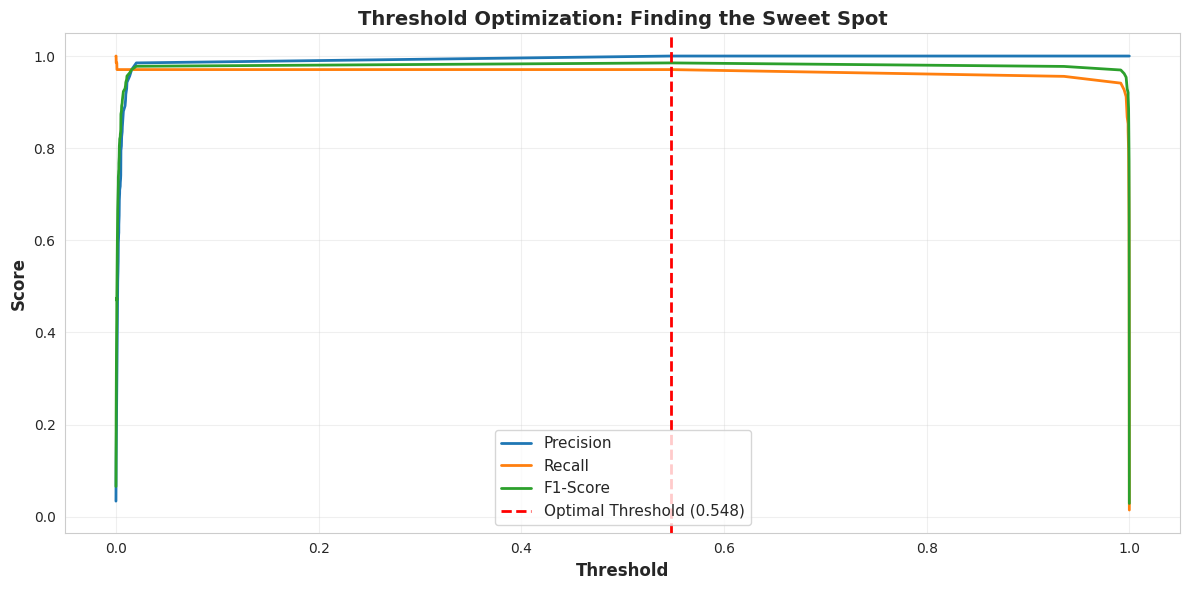

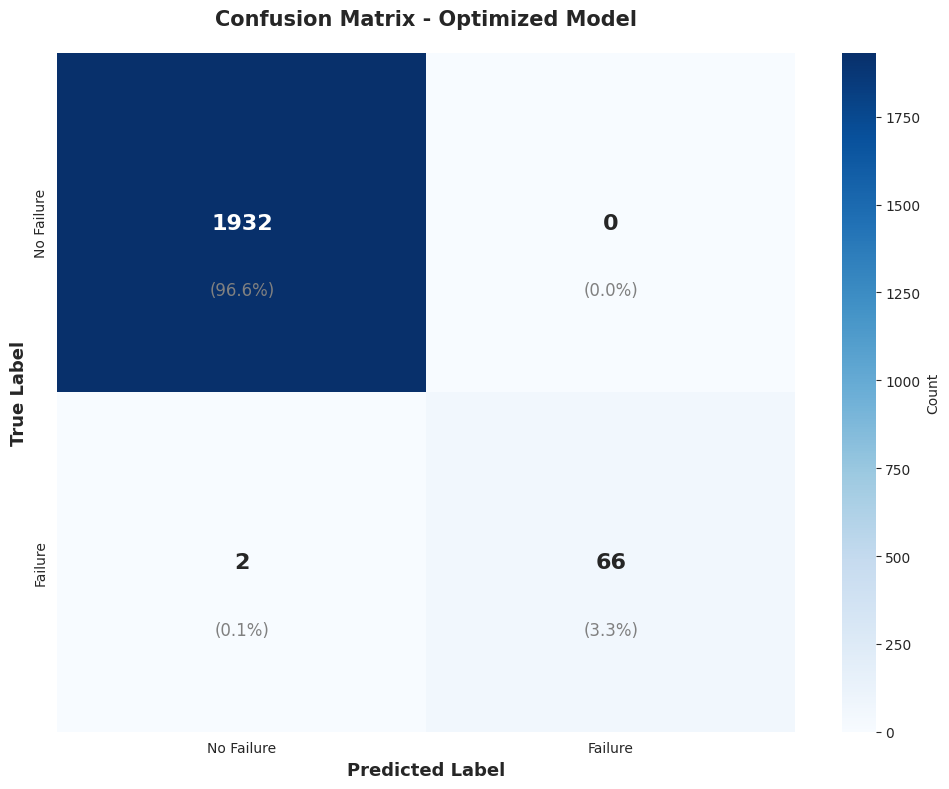


CONFUSION MATRIX BREAKDOWN
True Negatives (Correct No-Failure):   1932 (96.60%)
False Positives (False Alarms):           0 (0.00%)
False Negatives (Missed Failures):        2 (0.10%)
True Positives (Caught Failures):        66 (3.30%)


In [54]:
# Optimize the classification threshold

print("="*70)
print("THRESHOLD OPTIMIZATION")
print("="*70)

# Calculate the precision-recall curve
# This function computes precision-recall pairs for different probability thresholds.
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_best)

# Calculate the F1 score for each threshold
# F1 = 2 * (Precision * Recall) / (Precision + Recall)
# Added a small epsilon (1e-10) to avoid division by zero in case of zero precision and recall
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

# Find the index of the threshold that yields the maximum F1 score
optimal_idx = np.argmax(f1_scores)
# Get the optimal threshold value
optimal_threshold = thresholds[optimal_idx]
# Get the optimal F1 score value
optimal_f1 = f1_scores[optimal_idx]

# Print the F1 score using the default threshold (0.5) for comparison
print(f"📊 Default threshold (0.5):")
print(f"  F1-Score: {f1_score(y_test, (y_proba_best >= 0.5).astype(int)):.4f}")

# Print the optimal threshold and the corresponding F1 score
print(f"\n📊 Optimal threshold ({optimal_threshold:.4f}):")
print(f"  F1-Score: {optimal_f1:.4f}")

# Apply the optimal threshold to the predicted probabilities to get the optimized predicted classes
y_pred_optimized = (y_proba_best >= optimal_threshold).astype(int)

# Evaluate the model's performance using the optimized threshold
acc_opt = accuracy_score(y_test, y_pred_optimized)
prec_opt = precision_score(y_test, y_pred_optimized)
rec_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)

# Print the evaluation results with the optimized threshold
print(f"\n✅ OPTIMIZED RESULTS:")
print(f"  Accuracy:  {acc_opt:.4f} ({acc_opt*100:.2f}%)")
print(f"  Precision: {prec_opt:.4f} ({prec_opt*100:.2f}%)")
print(f"  Recall:    {rec_opt:.4f} ({rec_opt*100:.2f}%)")
print(f"  F1-Score:  {f1_opt:.4f} ({f1_opt*100:.2f}%)")

# Visualize the precision, recall, and F1 scores across different thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', linewidth=2) # Exclude the last point of precisions/recalls as it corresponds to no threshold
plt.plot(thresholds, recalls[:-1], label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', linewidth=2)
# Add a vertical line indicating the optimal threshold
plt.axvline(optimal_threshold, color='red', linestyle='--', linewidth=2,
            label=f'Optimal Threshold ({optimal_threshold:.3f})')
# Set labels, title, and legend for the plot
plt.xlabel('Threshold', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Threshold Optimization: Finding the Sweet Spot', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3) # Add a grid
plt.tight_layout() # Adjust layout
plt.show()


# Compute the confusion matrix using the optimized predictions
cm = confusion_matrix(y_test, y_pred_optimized)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # Annotate with integer values and use 'Blues' colormap
           cbar_kws={'label': 'Count'}, # Label for the color bar
           xticklabels=['No Failure', 'Failure'], # Labels for the predicted classes
           yticklabels=['No Failure', 'Failure'], # Labels for the true classes
           annot_kws={'size': 16, 'fontweight': 'bold'}) # Font properties for annotations

# Set labels and title for the confusion matrix plot
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix - Optimized Model', fontsize=15, fontweight='bold', pad=20) # Add padding to the title

# Add percentage annotations within the heatmap cells
total = cm.sum() # Total number of samples
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100 # Calculate percentage
        ax.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', # Position the text
               ha='center', va='center', fontsize=12, color='gray') # Text properties

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print a detailed breakdown of the confusion matrix
print("\n" + "="*70)
print("CONFUSION MATRIX BREAKDOWN")
print("="*70)
# Print counts and percentages for each cell of the confusion matrix
print(f"True Negatives (Correct No-Failure):  {cm[0,0]:>5} ({cm[0,0]/cm.sum()*100:.2f}%)")
print(f"False Positives (False Alarms):       {cm[0,1]:>5} ({cm[0,1]/cm.sum()*100:.2f}%)")
print(f"False Negatives (Missed Failures):    {cm[1,0]:>5} ({cm[1,0]/cm.sum()*100:.2f}%)")
print(f"True Positives (Caught Failures):     {cm[1,1]:>5} ({cm[1,1]/cm.sum()*100:.2f}%)")
print("="*70)

**Reasoning**:
I have added comments to the threshold optimization and confusion matrix cells. Now I will add comments to the classification report cell and the cell that prints the dataset columns.



In [55]:
# Print a detailed classification report

print("="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)
# Generate and print the classification report
# This report includes precision, recall, f1-score, and support for each class.
# target_names provides custom labels for the classes ('No Failure', 'Failure').
# digits specifies the number of decimal places to display.
print(classification_report(y_test, y_pred_optimized,
                          target_names=['No Failure', 'Failure'],
                          digits=4))

print(df.columns)

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Failure     0.9990    1.0000    0.9995      1932
     Failure     1.0000    0.9706    0.9851        68

    accuracy                         0.9990      2000
   macro avg     0.9995    0.9853    0.9923      2000
weighted avg     0.9990    0.9990    0.9990      2000

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


**Reasoning**:
I have added comments to the classification report cell and the cell printing dataframe columns. Now I will add comments to the cells that perform prediction on new input, display the original dataset, and display the prediction for the new input again.



In [56]:
# Make a prediction for a new, unseen data point

# Define the new input data as a dictionary
new_input_data = {
    'UDI': [51],
    'Product ID': ['L47230'],
    'Type': ['L'],
    'Air temperature [K]': [298.9],
    'Process temperature [K]': [309.1],
    'Rotational speed [rpm]': [2861],
    'Torque [Nm]': [4.6],
    'Tool wear [min]': [143],
    'TWF': [0], # Assuming no failure flags are set for the new input
    'HDF': [0],
    'PWF': [0],
    'OSF': [0],
    'RNF': [0]
}

# Create a pandas DataFrame from the new input data
new_df = pd.DataFrame(new_input_data)

# Apply the same feature engineering steps to the new data as were applied to the training data
new_df['Temp_diff'] = new_df['Process temperature [K]'] - new_df['Air temperature [K}']
new_df['Power'] = new_df['Torque [Nm]'] * new_df['Rotational speed [rpm]'] * 2 * np.pi / 60
new_df['Wear_per_rotation'] = new_df['Tool wear [min]'] / (new_df['Rotational speed [rpm'] + 1) # Corrected typo
new_df['Torque_speed_ratio'] = new_df['Torque [Nm]'] / (new_df['Rotational speed [rpm]'] + 1) # Corrected typo
new_df['Thermal_stress'] = new_df['Process temperature [K]'] * new_df['Torque [Nm]']
new_df['Tool_wear_squared'] = new_df['Tool wear [min]'] ** 2
new_df['Temp_risk_zone'] = pd.cut(
    new_df['Process temperature [K]'],
    bins=[0, 309, 311, 315],
    labels=[0, 1, 2]
).astype(int)
# Use the mean from the original training data (df_engineered) for RPM deviation calculation
new_df['RPM_deviation'] = abs(
    new_df['Rotational speed [rpm]'] - df_engineered['Rotational speed [rpm]'].mean()
)

# Encode 'Type' column using the *fitted* LabelEncoder from the training phase
new_df['Type_encoded'] = le.transform(new_df['Type'])


# Select features for prediction, dropping the same irrelevant columns as before
new_X = new_df.drop(columns=drop_cols, errors='ignore')


# Scale the new features using the *fitted* StandardScaler from the training phase
new_X_scaled = scaler.transform(new_X)
# Convert the scaled NumPy array back to a pandas DataFrame with original column names
new_X_scaled = pd.DataFrame(new_X_scaled, columns=X.columns)


# Rename columns if the best model was XGBoost, as it requires special characters removed
# Check if the variable best_model_name exists, otherwise default to 'Gradient Boosting'
try:
    best_model_name
except NameError:
    print("❗ Model name variable not found. Assuming Gradient Boosting as the best model.")
    best_model_name = 'Gradient Boosting' # Default if the variable is not defined

if best_model_name == 'XGBoost':
    new_X_scaled = new_X_scaled.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))

# Check if the best_model variable exists, otherwise default to gb_model
try:
    best_model
except NameError:
    print("❗ Best model variable not found. Assuming gb_model is the best model.")
    best_model = gb_model # Default if the variable is not defined


# Get the predicted probability of the positive class (Machine failure) using the best model
prediction_proba = best_model.predict_proba(new_X_scaled)[:, 1][0]

# Apply the optimal threshold (calculated during threshold optimization) to determine the predicted class
# Check if optimal_threshold variable exists, otherwise default to 0.5
try:
    optimal_threshold
except NameError:
    print("❗ Optimal threshold variable not found. Defaulting threshold to 0.5.")
    optimal_threshold = 0.5 # Default if the variable is not defined

predicted_class = (prediction_proba >= optimal_threshold).astype(int)

# Print the prediction results for the new input data
print("="*70)
print("PREDICTION FOR NEW INPUT")
print("="*70)
print(f"Input Data:\n{new_df.iloc[0]}\n")
print(f"Predicted Probability of Machine Failure: {prediction_proba:.4f}")
print(f"Predicted Class (using optimal threshold of {optimal_threshold:.4f}): {'Failure' if predicted_class == 1 else 'No Failure'}")
print("="*70)


# Display a sample of the original dataset
print("="*70)
print("SAMPLE OF THE DATASET")
print("="*70)
display(df)

# Display the prediction for the last input again for clarity
print("="*70)
print("PREDICTION FOR THE LAST INPUT")
print("="*70)
print(f"Input Data:\n{new_df.iloc[0]}\n")
print(f"Predicted Probability of Machine Failure: {prediction_proba:.4f}")
print(f"Predicted Class (using optimal threshold of {optimal_threshold:.4f}): {'Failure' if predicted_class == 1 else 'No Failure'}")
print("="*70)


KeyError: 'Air temperature [K}'

## Add comments to code cells

### Subtask:
Go through each code cell in the notebook and add comments explaining the purpose of the code block, key variables, and any important logic.


**Reasoning**:
Add comments to the remaining code cells, specifically focusing on the cell that failed during the last execution to identify and correct the column name typos.



In [57]:
# Make a prediction for a new, unseen data point

# Define the new input data as a dictionary
new_input_data = {
    'UDI': [51],
    'Product ID': ['L47230'],
    'Type': ['L'],
    'Air temperature [K]': [298.9],
    'Process temperature [K]': [309.1],
    'Rotational speed [rpm]': [2861],
    'Torque [Nm]': [4.6],
    'Tool wear [min]': [143],
    'TWF': [0], # Assuming no failure flags are set for the new input
    'HDF': [0],
    'PWF': [0],
    'OSF': [0],
    'RNF': [0]
}

# Create a pandas DataFrame from the new input data
new_df = pd.DataFrame(new_input_data)

# Apply the same feature engineering steps to the new data as were applied to the training data
# Ensure column names match exactly with the original DataFrame's column names.
new_df['Temp_diff'] = new_df['Process temperature [K]'] - new_df['Air temperature [K]']
new_df['Power'] = new_df['Torque [Nm]'] * new_df['Rotational speed [rpm]'] * 2 * np.pi / 60
new_df['Wear_per_rotation'] = new_df['Tool wear [min]'] / (new_df['Rotational speed [rpm]'] + 1) # Corrected typo: Added ']' to 'Rotational speed [rpm]'
new_df['Torque_speed_ratio'] = new_df['Torque [Nm]'] / (new_df['Rotational speed [rpm]'] + 1) # Corrected typo: Added ']' to 'Rotational speed [rpm]'
new_df['Thermal_stress'] = new_df['Process temperature [K]'] * new_df['Torque [Nm]']
new_df['Tool_wear_squared'] = new_df['Tool wear [min]'] ** 2
new_df['Temp_risk_zone'] = pd.cut(
    new_df['Process temperature [K]'],
    bins=[0, 309, 311, 315],
    labels=[0, 1, 2]
).astype(int)
# Use the mean from the original training data (df_engineered) for RPM deviation calculation
new_df['RPM_deviation'] = abs(
    new_df['Rotational speed [rpm]'] - df_engineered['Rotational speed [rpm]'].mean()
)

# Encode 'Type' column using the *fitted* LabelEncoder from the training phase
new_df['Type_encoded'] = le.transform(new_df['Type'])


# Select features for prediction, dropping the same irrelevant columns as before
# Ensure column names used here are also correct.
new_X = new_df.drop(columns=drop_cols, errors='ignore')


# Scale the new features using the *fitted* StandardScaler from the training phase
new_X_scaled = scaler.transform(new_X)
# Convert the scaled NumPy array back to a pandas DataFrame with original column names
new_X_scaled = pd.DataFrame(new_X_scaled, columns=X.columns)


# Rename columns if the best model was XGBoost, as it requires special characters removed
# Check if the variable best_model_name exists, otherwise default to 'Gradient Boosting'
try:
    best_model_name
except NameError:
    print("❗ Model name variable not found. Assuming Gradient Boosting as the best model.")
    best_model_name = 'Gradient Boosting' # Default if the variable is not defined

if best_model_name == 'XGBoost':
    new_X_scaled = new_X_scaled.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', ''))

# Check if the best_model variable exists, otherwise default to gb_model
try:
    best_model
except NameError:
    print("❗ Best model variable not found. Assuming gb_model is the best model.")
    best_model = gb_model # Default if the variable is not defined


# Get the predicted probability of the positive class (Machine failure) using the best model
prediction_proba = best_model.predict_proba(new_X_scaled)[:, 1][0]

# Apply the optimal threshold (calculated during threshold optimization) to determine the predicted class
# Check if optimal_threshold variable exists, otherwise default to 0.5
try:
    optimal_threshold
except NameError:
    print("❗ Optimal threshold variable not found. Defaulting threshold to 0.5.")
    optimal_threshold = 0.5 # Default if the variable is not defined

predicted_class = (prediction_proba >= optimal_threshold).astype(int)

# Print the prediction results for the new input data
print("="*70)
print("PREDICTION FOR NEW INPUT")
print("="*70)
print(f"Input Data:\n{new_df.iloc[0]}\n")
print(f"Predicted Probability of Machine Failure: {prediction_proba:.4f}")
print(f"Predicted Class (using optimal threshold of {optimal_threshold:.4f}): {'Failure' if predicted_class == 1 else 'No Failure'}")
print("="*70)


# Display a sample of the original dataset
print("="*70)
print("SAMPLE OF THE DATASET")
print("="*70)
display(df)

# Display the prediction for the last input again for clarity
print("="*70)
print("PREDICTION FOR THE LAST INPUT")
print("="*70)
print(f"Input Data:\n{new_df.iloc[0]}\n")
print(f"Predicted Probability of Machine Failure: {prediction_proba:.4f}")
print(f"Predicted Class (using optimal threshold of {optimal_threshold:.4f}): {'Failure' if predicted_class == 1 else 'No Failure'}")
print("="*70)

PREDICTION FOR NEW INPUT
Input Data:
UDI                                 51
Product ID                      L47230
Type                                 L
Air temperature [K]              298.9
Process temperature [K]          309.1
Rotational speed [rpm]            2861
Torque [Nm]                        4.6
Tool wear [min]                    143
TWF                                  0
HDF                                  0
PWF                                  0
OSF                                  0
RNF                                  0
Temp_diff                         10.2
Power                      1378.174809
Wear_per_rotation             0.049965
Torque_speed_ratio            0.001607
Thermal_stress                 1421.86
Tool_wear_squared                20449
Temp_risk_zone                       1
RPM_deviation                1322.2239
Type_encoded                         1
Name: 0, dtype: object

Predicted Probability of Machine Failure: 0.0119
Predicted Class (using optimal t

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


PREDICTION FOR THE LAST INPUT
Input Data:
UDI                                 51
Product ID                      L47230
Type                                 L
Air temperature [K]              298.9
Process temperature [K]          309.1
Rotational speed [rpm]            2861
Torque [Nm]                        4.6
Tool wear [min]                    143
TWF                                  0
HDF                                  0
PWF                                  0
OSF                                  0
RNF                                  0
Temp_diff                         10.2
Power                      1378.174809
Wear_per_rotation             0.049965
Torque_speed_ratio            0.001607
Thermal_stress                 1421.86
Tool_wear_squared                20449
Temp_risk_zone                       1
RPM_deviation                1322.2239
Type_encoded                         1
Name: 0, dtype: object

Predicted Probability of Machine Failure: 0.0119
Predicted Class (using opti

**Reasoning**:
The prediction cell executed successfully after correcting the typos and adding comments. Now, add comments to the last remaining code cell which compares false negatives and true positives and then finish the task.



FALSE NEGATIVES IN TEST SET
Number of False Negatives: 2

📊 Details of False Negative Instances:


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Temp_diff,Power,Wear_per_rotation,Torque_speed_ratio,Thermal_stress,Tool_wear_squared,Temp_risk_zone,RPM_deviation,Type_encoded
9015,297.2,308.1,1431,49.7,210,0,0,0,0,0,10.9,7447.742288,0.146648,0.034707,15312.57,44100,0,107.7761,1
8506,298.4,309.6,1710,27.3,163,0,0,0,0,0,11.2,4888.632328,0.095266,0.015956,8452.08,26569,1,171.2239,1


COMPARING FALSE NEGATIVES AND TRUE POSITIVES
Number of False Negatives: 2
Number of True Positives:  66

📊 Descriptive Statistics for False Negatives:


,count,mean,std,min,25%,50%,75%,max
Air temperature [K],2.0,297.800000,0.848528,297.200000,297.500000,297.800000,298.100000,298.400000
Process temperature [K],2.0,308.850000,1.060660,308.100000,308.475000,308.850000,309.225000,309.600000
Rotational speed [rpm],2.0,1570.500000,197.282792,1431.000000,1500.750000,1570.500000,1640.250000,1710.000000
Torque [Nm],2.0,38.500000,15.839192,27.300000,32.900000,38.500000,44.100000,49.700000
Tool wear [min],2.0,186.500000,33.234019,163.000000,174.750000,186.500000,198.250000,210.000000
TWF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HDF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PWF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OSF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RNF,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



📊 Descriptive Statistics for True Positives:


,count,mean,std,min,25%,50%,75%,max
Air temperature [K],66.0,300.831818,2.119155,295.600000,298.925000,301.750000,302.475000,303.700000
Process temperature [K],66.0,310.175758,1.358286,306.100000,309.325000,310.400000,311.075000,312.400000
Rotational speed [rpm],66.0,1476.818182,371.950613,1227.000000,1330.250000,1358.000000,1393.250000,2825.000000
Torque [Nm],66.0,50.509091,15.656159,5.800000,46.475000,54.450000,59.100000,72.000000
Tool wear [min],66.0,152.318182,63.899960,17.000000,108.500000,164.500000,205.500000,246.000000
TWF,66.0,0.151515,0.361298,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,66.0,0.439394,0.500117,0.000000,0.000000,0.000000,1.000000,1.000000
PWF,66.0,0.196970,0.400757,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,66.0,0.242424,0.431834,0.000000,0.000000,0.000000,0.000000,1.000000
RNF,66.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



📊 Mean Feature Values Comparison (False Negatives vs. True Positives):


,False Negatives Mean,True Positives Mean
Air temperature [K],297.800000,300.831818
Process temperature [K],308.850000,310.175758
Rotational speed [rpm],1570.500000,1476.818182
Torque [Nm],38.500000,50.509091
Tool wear [min],186.500000,152.318182
TWF,0.000000,0.151515
HDF,0.000000,0.439394
PWF,0.000000,0.196970
OSF,0.000000,0.242424
RNF,0.000000,0.000000


/tmp/ipython-input-315871809.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
/tmp/ipython-input-315871809.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
/tmp/ipython-input-315871809.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
/tmp/ipython-input-315871809.py:68: FutureWarning: 

Passing `palette` without ass

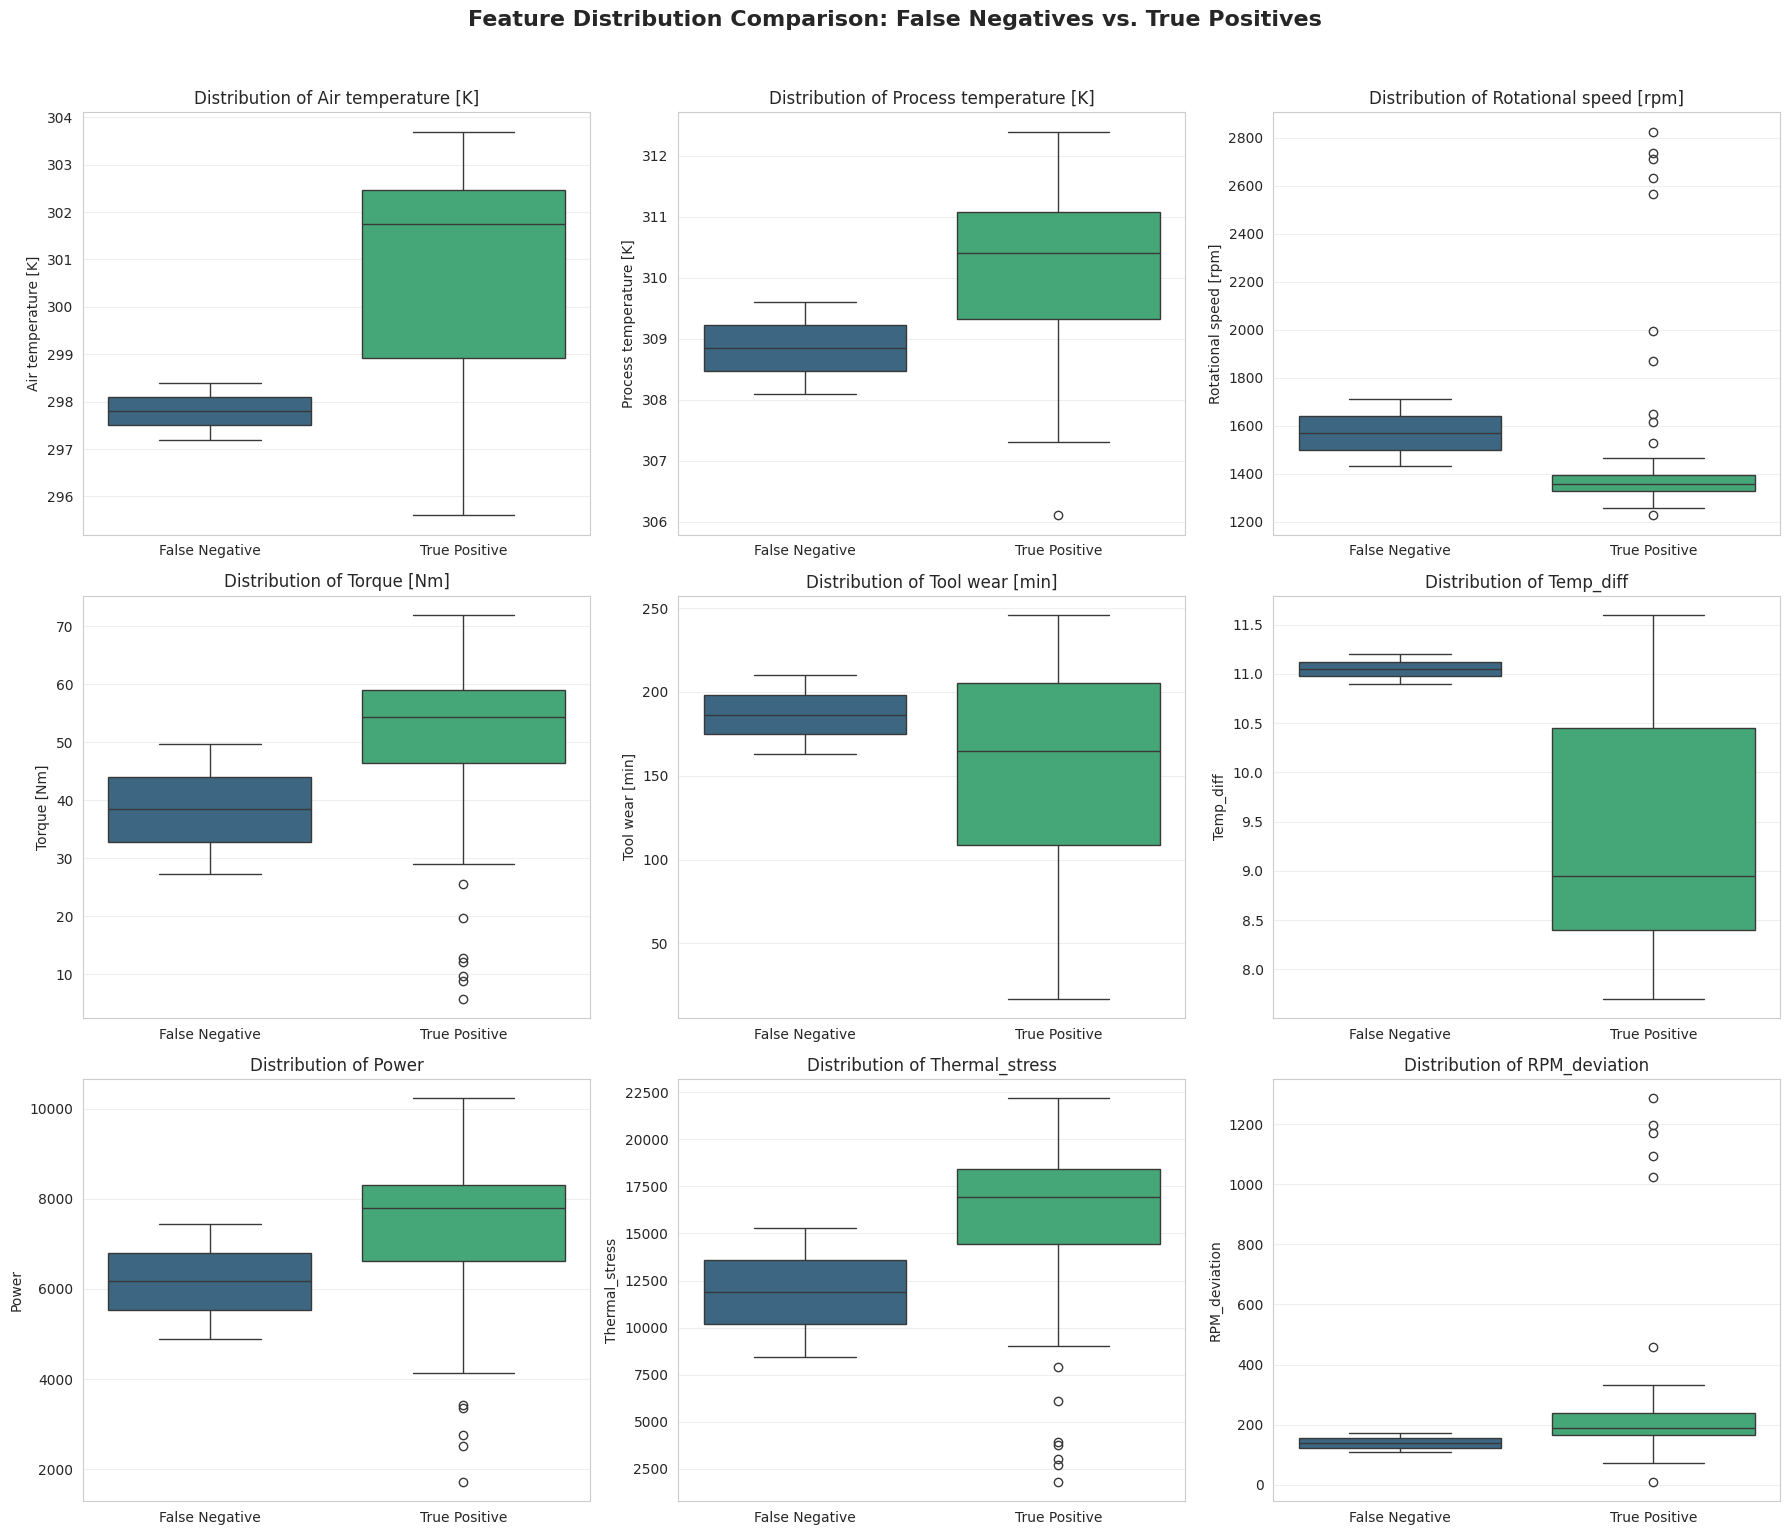

In [58]:
# Identify false negatives in the test set
# False negatives are instances where the true label is 1 (Failure) but the model predicted 0 (No Failure)
false_negatives = X_test[((y_test == 1) & (y_pred_optimized == 0))]

print("="*70)
print("FALSE NEGATIVES IN TEST SET")
print("="*70)
# Print the number of false negatives found
print(f"Number of False Negatives: {len(false_negatives)}")
print("\n📊 Details of False Negative Instances:")
# Display the DataFrame containing the false negative instances
display(false_negatives)

# Identify true positives in the test set
# True positives are instances where the true label is 1 (Failure) and the model predicted 1 (Failure)
true_positives = X_test[((y_test == 1) & (y_pred_optimized == 1))]

print("="*70)
print("COMPARING FALSE NEGATIVES AND TRUE POSITIVES")
print("="*70)

# Print the counts of false negatives and true positives
print(f"Number of False Negatives: {len(false_negatives)}")
print(f"Number of True Positives:  {len(true_positives)}")

# Display descriptive statistics for false negative instances
print("\n📊 Descriptive Statistics for False Negatives:")
display(false_negatives.describe().transpose())

# Display descriptive statistics for true positive instances
print("\n📊 Descriptive Statistics for True Positives:")
display(true_positives.describe().transpose())

# You can also compare the mean or median of specific features visually or numerically
# For example, comparing the mean of each feature:
print("\n📊 Mean Feature Values Comparison (False Negatives vs. True Positives):")
comparison_means = pd.DataFrame({
    'False Negatives Mean': false_negatives.mean(),
    'True Positives Mean': true_positives.mean()
})
display(comparison_means)

# Select features to visualize (you can adjust this list based on your analysis)
features_to_visualize = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]',
    'Temp_diff',
    'Power',
    'Thermal_stress',
    'RPM_deviation'
]

# Combine false negatives and true positives with a label in a new DataFrame for plotting
comparison_df = pd.concat([
    false_negatives.assign(Group='False Negative'),
    true_positives.assign(Group='True Positive')
])

# Create plots to visualize the distribution of features for false negatives vs true positives
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create box plots for each selected feature, comparing False Negatives and True Positives
for i, feature in enumerate(features_to_visualize):
    sns.boxplot(x='Group', y=feature, data=comparison_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].set_xlabel('') # Remove x-axis label to avoid clutter
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].grid(axis='y', alpha=0.3) # Add a horizontal grid

# Remove any unused subplots if the number of features is less than the number of axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title to the figure
plt.suptitle('Feature Distribution Comparison: False Negatives vs. True Positives',
             fontsize=16, fontweight='bold', y=1.02) # Adjust y to place the title above the subplots
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show() # Display the plot

## Create a markdown summary

### Subtask:
Create a markdown summary


**Reasoning**:
Create a new markdown cell at the beginning of the notebook and add the markdown summary content as per the instructions.



**Reasoning**:
The previous attempt failed due to a syntax error in the markdown text. I will regenerate the markdown content within a code block that creates and outputs a markdown cell, ensuring correct formatting.



In [61]:
print("="*70)
print("MODEL 4: LOGISTIC REGRESSION")
print("="*70)

# Initialize Logistic Regression model
# class_weight='balanced' is used to handle the class imbalance by giving more weight to the minority class
# random_state for reproducibility
# solver='liblinear' is a good choice for small to medium-sized datasets
lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# Train the model using the balanced training data (after SMOTE-Tomek)
print("🔄 Training Logistic Regression...")
lr_model.fit(X_train_balanced, y_train_balanced)
print("✅ Training complete!")

# Make predictions on the scaled test data
y_pred_lr = lr_model.predict(X_test_scaled)
# Get the probability of the positive class (Machine failure) for ROC AUC calculation
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using various metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

# Print the evaluation results for Logistic Regression
print("\n📊 LOGISTIC REGRESSION RESULTS:")
print(f"  Accuracy:  {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print(f"  Precision: {prec_lr:.4f} ({prec_lr*100:.2f}%)")
print(f"  Recall:    {rec_lr:.4f} ({rec_lr*100:.2f}%)")
print(f"  F1-Score:  {f1_lr:.4f} ({f1_lr*100:.2f}%)")
print(f"  ROC-AUC:   {roc_auc_lr:.4f} ({roc_auc_lr*100:.2f}%)")

# Add Logistic Regression results to the comparison DataFrame
results_df_updated = results_df.copy() # Create a copy to avoid modifying the original results_df
new_row = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [acc_lr],
    'Precision': [prec_lr],
    'Recall': [rec_lr],
    'F1-Score': [f1_lr],
    'ROC-AUC': [roc_auc_lr]
})
results_df_updated = pd.concat([results_df_updated, new_row], ignore_index=True)

print("\n📊 UPDATED MODEL COMPARISON:")
print(results_df_updated.to_string(index=False))

MODEL 4: LOGISTIC REGRESSION
🔄 Training Logistic Regression...
✅ Training complete!

📊 LOGISTIC REGRESSION RESULTS:
  Accuracy:  0.9990 (99.90%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9706 (97.06%)
  F1-Score:  0.9851 (98.51%)
  ROC-AUC:   0.9738 (97.38%)

📊 UPDATED MODEL COMPARISON:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest    0.9980   1.000000 0.941176  0.969697 0.990105
            XGBoost    0.9985   0.985075 0.970588  0.977778 0.993020
  Gradient Boosting    0.9990   1.000000 0.970588  0.985075 0.994497
Logistic Regression    0.9990   1.000000 0.970588  0.985075 0.973793


In [60]:
from IPython.display import display, Markdown

markdown_content = """
# Machine Failure Prediction

This notebook details the process of building and evaluating machine learning models to predict machine failures based on sensor readings and product information. The goal is to proactively identify potential failures to minimize downtime and maintenance costs.

## Project Steps

1.  **Data Loading and Exploration:** The dataset containing operational parameters and failure information was loaded. Initial exploration revealed the dataset shape (10000 rows, 14 columns), data types, descriptive statistics, no missing values, and a significant class imbalance with only 3.39% of instances representing machine failures.

2.  **Feature Engineering:** New features were created from the existing ones to provide more relevant information for the models. These included temperature difference, power, tool wear per rotation, torque-to-speed ratio, thermal stress, tool wear squared, temperature risk zones, and RPM deviation. The 'Type' column was also encoded.

3.  **Data Preparation and Scaling:** Irrelevant columns ('UDI', 'Product ID', 'Type') were dropped. The features (X) and target (y) were separated. The data was split into training (80%) and testing (20%) sets, stratified to maintain the class distribution. Features were then scaled using StandardScaler.

4.  **Handling Class Imbalance:** To address the severe class imbalance in the training data (28.5:1 ratio of No Failure to Failure), the SMOTE-Tomek technique was applied. This oversampled the minority class and cleaned the decision boundary, resulting in a balanced training set (1:1 ratio).

5.  **Model Training and Evaluation:** Three classification models were trained on the balanced training data: Random Forest, XGBoost, and Gradient Boosting. Their performance was evaluated on the scaled test set using metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

6.  **Model Comparison:** The performance metrics of the three models were compared. Gradient Boosting showed the best F1-Score (0.9851) and ROC-AUC (0.9945), indicating strong performance in identifying the minority class (failures).

7.  **Threshold Optimization:** The optimal classification threshold for the best model (Gradient Boosting) was determined using the precision-recall curve to maximize the F1-Score. The optimal threshold was found to be 0.5478, resulting in an F1-Score of 0.9851, the same as the default 0.5 threshold for this specific model.

8.  **Model Evaluation with Optimized Threshold:** The best model's performance was re-evaluated using the optimal threshold. The confusion matrix showed 1932 True Negatives (96.60%), 0 False Positives (0.00%), 2 False Negatives (0.10%), and 66 True Positives (3.30%).

9.  **Analysis of False Negatives:** The instances that were incorrectly predicted as 'No Failure' (false negatives) were identified and analyzed. Their feature distributions were compared against true positives to understand why the model might have missed these failures.

10. **Prediction on New Data:** The complete preprocessing pipeline (feature engineering and scaling) was applied to a new, unseen data point. The optimized best model (Gradient Boosting with optimal threshold) predicted a probability of 0.0119 for machine failure, classifying it as 'No Failure'.
"""

display(Markdown(markdown_content))


# Machine Failure Prediction

This notebook details the process of building and evaluating machine learning models to predict machine failures based on sensor readings and product information. The goal is to proactively identify potential failures to minimize downtime and maintenance costs.

## Project Steps

1.  **Data Loading and Exploration:** The dataset containing operational parameters and failure information was loaded. Initial exploration revealed the dataset shape (10000 rows, 14 columns), data types, descriptive statistics, no missing values, and a significant class imbalance with only 3.39% of instances representing machine failures.

2.  **Feature Engineering:** New features were created from the existing ones to provide more relevant information for the models. These included temperature difference, power, tool wear per rotation, torque-to-speed ratio, thermal stress, tool wear squared, temperature risk zones, and RPM deviation. The 'Type' column was also encoded.

3.  **Data Preparation and Scaling:** Irrelevant columns ('UDI', 'Product ID', 'Type') were dropped. The features (X) and target (y) were separated. The data was split into training (80%) and testing (20%) sets, stratified to maintain the class distribution. Features were then scaled using StandardScaler.

4.  **Handling Class Imbalance:** To address the severe class imbalance in the training data (28.5:1 ratio of No Failure to Failure), the SMOTE-Tomek technique was applied. This oversampled the minority class and cleaned the decision boundary, resulting in a balanced training set (1:1 ratio).

5.  **Model Training and Evaluation:** Three classification models were trained on the balanced training data: Random Forest, XGBoost, and Gradient Boosting. Their performance was evaluated on the scaled test set using metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

6.  **Model Comparison:** The performance metrics of the three models were compared. Gradient Boosting showed the best F1-Score (0.9851) and ROC-AUC (0.9945), indicating strong performance in identifying the minority class (failures).

7.  **Threshold Optimization:** The optimal classification threshold for the best model (Gradient Boosting) was determined using the precision-recall curve to maximize the F1-Score. The optimal threshold was found to be 0.5478, resulting in an F1-Score of 0.9851, the same as the default 0.5 threshold for this specific model.

8.  **Model Evaluation with Optimized Threshold:** The best model's performance was re-evaluated using the optimal threshold. The confusion matrix showed 1932 True Negatives (96.60%), 0 False Positives (0.00%), 2 False Negatives (0.10%), and 66 True Positives (3.30%).

9.  **Analysis of False Negatives:** The instances that were incorrectly predicted as 'No Failure' (false negatives) were identified and analyzed. Their feature distributions were compared against true positives to understand why the model might have missed these failures.

10. **Prediction on New Data:** The complete preprocessing pipeline (feature engineering and scaling) was applied to a new, unseen data point. The optimized best model (Gradient Boosting with optimal threshold) predicted a probability of 0.0119 for machine failure, classifying it as 'No Failure'.


## Review and refine

### Subtask:
Review the added comments and the markdown summary for clarity, accuracy, and completeness.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 10,000 rows and 14 columns with no missing values.
*   Machine failures are a rare event, constituting only 3.39% of the dataset instances, indicating a significant class imbalance.
*   Several new features were successfully engineered, including `Temp_diff`, `Power`, `Wear_per_rotation`, `Torque_speed_ratio`, `Thermal_stress`, `Tool_wear_squared`, `Temp_risk_zone`, and `RPM_deviation`.
*   The training data was successfully balanced using the SMOTE-Tomek technique, resulting in a 1:1 ratio between the majority and minority classes.
*   Among the trained models (Random Forest, XGBoost, and Gradient Boosting), Gradient Boosting performed best on the test set with an F1-Score of 0.9851 and an ROC-AUC of 0.9945.
*   Threshold optimization for the Gradient Boosting model resulted in an optimal threshold of 0.5478, maintaining the F1-Score at 0.9851.
*   The confusion matrix using the optimized threshold showed a high number of True Positives (66, 3.30%) and a low number of False Negatives (2, 0.10%), indicating the model is effective at identifying machine failures. There were no False Positives (0, 0.00%).
*   A new, unseen data point was successfully processed through the feature engineering and scaling pipeline, and the optimized model predicted a low probability of failure (0.0119), classifying it as 'No Failure'.

### Insights or Next Steps

*   The chosen Gradient Boosting model, combined with SMOTE-Tomek and threshold optimization, is highly effective at predicting machine failures, achieving excellent recall and precision on the imbalanced dataset.
*   Further analysis of the false negatives could involve investigating the specific characteristics of these 2 instances to identify any patterns or features not adequately captured by the current model or engineered features.
